# 📖 Introducción

En este notebook se abordarán conceptos fundamentales de **probabilidad y estadística**, enfocados en el estudio de **variables aleatorias** y sus propiedades.
Se explorarán tanto variables **discretas** como **continuas**, mostrando sus funciones de densidad, propiedades como esperanza y varianza, y ejemplos
prácticos de cada tipo. 

Adicionalmente, se incluirán técnicas de **simulación de variables aleatorias**, como la **transformada inversa**, así como el uso 
de **funciones generadoras de momentos (FGM)** y **funciones características** para el cálculo de momentos y análisis de distribuciones. 

Finalmente, se presentarán conceptos clave de la teoría de probabilidad como la **Ley de los Grandes Números (LGN)** y el 
**Teorema Central del Límite (TCL)**, acompañados de ejemplos y visualizaciones en Python que permitirán consolidar los conocimientos mediante la práctica.


## 🎯 Objetivo

El **objetivo** de este notebook es proporcionar una comprensión clara y práctica de las **variables aleatorias**, sus propiedades y aplicaciones, así como de herramientas estadísticas fundamentales que permiten:

- Analizar distribuciones discretas y continuas.
- Calcular momentos y funciones características.
- Simular variables aleatorias mediante métodos computacionales.
- Aplicar resultados teóricos como la Ley de los Grandes Números y el Teorema Central del Límite para interpretar el comportamiento de grandes conjuntos de datos.

---


# 📘 Variables Aleatorias

Recordemos que una **variable aleatoria** real $X$ es una función $X: \Omega \to \mathbb{R}$

Sabemos que la **ley de una variable aleatoria discreta** $X$ (es la función de densidad, función de masa de probabilidad), se define como sigue:

$$ f_{X}(x) = \begin{cases} \mathbb{P}(X=x), \quad \text{si } x\in R_{X} \\ \qquad 0, \quad \text{en otro caso} \end{cases} $$

donde $R_{X}$ es el rango de la variable aleatoria $X$.

Para nuestro evento $S_{n}$ se tiene la siguiente variable aleatoria:

$$S : \Omega \to \{ 2,3,4,5,6,7,8,9,10,11,12 \}$$

## 1. Introducción

**Variable aleatoria**: una variable aleatoria $(X)$ es una función que asigna a cada resultado de un experimento aleatorio un número real.

- Clasificación:
  - **Discretas**: toman valores en un conjunto numerable (p.ej. enteros). Se describe por una función de probabilidad $(p_X(x)=P(X=x)).$
  - **Continuas**: toman valores en un intervalo de $(\mathbb{R}).$ Se describe por una función de densidad $(f_X(x))$ tal que $(P(a\le X\le b)=\int_a^b f_X(x)dx).$

Funciones importantes:
- **Función de distribución acumulada (CDF)**: $(F_X(x)=P(X\le x)).$
- **Esperanza**: $(E[X]).$
- **Varianza**: $(Var(X)=E[(X-E[X])^2]).$

En lo que sigue veremos las fórmulas teóricas y códigos para visualizar y simular cada caso.


In [2]:
# Importar librerías comunes
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
sns.set(style="whitegrid")
np.random.seed(0)


## 2. Variables Aleatorias Discretas

**Definición (discreta)**: $(X)$ es discreta si existe un conjunto contable de valores $({x_i})$ tal que

$$\sum_{i} P(X=x_i)=1$$

y la función de masa de probabilidad es $p_X(x_i)=P(X=x_i)$.

**Esperanza**: $$E[X]= \sum_{i}^{x_i} p_X(x_i).$$

**Varianza**: $$Var(X)=E[X^2]-(E[X])^2.$$


### 2.1 Variable aleatoria Bernoulli

Este modelo se aplica a un experiemento cuyo espacio muestral tiene dos resultados
$$ \Omega = \{\text{éxito} , \text{fracaso}\}$$
y definimos
- $X(\{\text{éxito}\}) =1$
- $X(\{\text{fracaso}\}) =0$

Las probabilidades asociadas a este modelo son
- $\mathbb{P}(\{\text{éxito}\}) = p$
- $\mathbb{P}(\{\text{fracaso}\}) = 1-p$, 

donde $0<p<1$.

La función de densidad, está definida de la siguiente manera
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} p^x(1-p)^{1-x}, \quad \text{si } x\in \{0,1\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notación:** $X\sim Ber(p)$

Mediante la combinación de v.a. Bernoulli es posible construir otras v.a.

La esperanza y varianza de $X\sim Ber(p)$, está dada por:

$$ \mathbb{E}[X] = \sum_{x=0}^{1} xf_{X}(x) = 0\cdot(1-p) + 1\cdot p = p$$
y
$$ \mathbb{E}[X^2] = \sum_{x=0}^{1} x^2 f_{X}(x) = 0^2\cdot(1-p) + 1^2\cdot p = p$$
entonces
$$\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 = p - p^2 = p(1-p) $$

**{Ejemplo:**  Variable Aleatoria Bernoulli en un experimento médico

En un ensayo clínico se administra un nuevo medicamento a un paciente y se define la variable aleatoria $X$ de la siguiente forma:

$$
X = 
\begin{cases}
1, & \text{si el paciente presenta mejoría} \\
0, & \text{si el paciente no presenta mejoría}
\end{cases}
$$

Supongamos que la probabilidad de mejoría con este medicamento es $p = 0.8$.  
Entonces, $X \sim Bernoulli(p=0.8)$.

**{Función de probabilidad}**

La función de probabilidad es:
$$
P(X = x) = p^x (1-p)^{1-x}, \quad x \in \{0,1\}
$$

En este caso:

$$
P(X=1) = p = 0.8, \quad P(X=0) = 1-p = 0.2
$$

**{Esperanza y Varianza}**

$$
E[X] = p = 0.8
$$

$$
\mathrm{Var}(X) = p(1-p) = 0.8 \times 0.2 = 0.16
$$


La variable aleatoria $X$ modela el éxito de un tratamiento médico en un paciente.  
Si repetimos el experimento en muchos pacientes, la proporción de aquellos que muestran mejoría se aproximará al valor esperado $E[X]=0.8$.


La función de densidad es: [0.7 0.3]


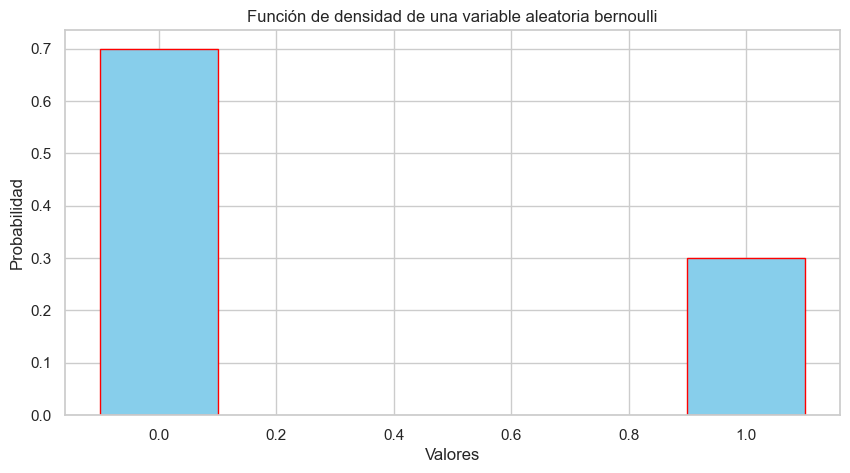

In [4]:
# Distribución bernoulli

from scipy.stats import bernoulli

# Definimos la probabilidad de éxito
p = 0.3

# Defino los posibles valores de la variable aleatoria
x = [0,1]

# Calcular la función de densidad
pmf = bernoulli.pmf(x, p)

print("La función de densidad es:", pmf)

# Graficamos la función de densidad
plt.figure(figsize=(10,5)) # tamaño de la figura
plt.bar(x, pmf , width = 0.2, color='skyblue', edgecolor='red') # gráfico de barras
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una variable aleatoria bernoulli')
plt.grid(True)
plt.show()


In [7]:
# Podemos calcular la esperanza y varianza de la variable aleatoria bernoulli
print("La esperanza es:", bernoulli.mean(p))
print("La varianza es:", bernoulli.var(p))

La esperanza es: 0.3
La varianza es: 0.21


Frecuencias observadas: {np.int32(0): np.int64(697), np.int32(1): np.int64(303)}
Probabilidades empíricas: {np.int32(0): np.float64(0.697), np.int32(1): np.float64(0.303)}
Teórico: P(1)=p= 0.3


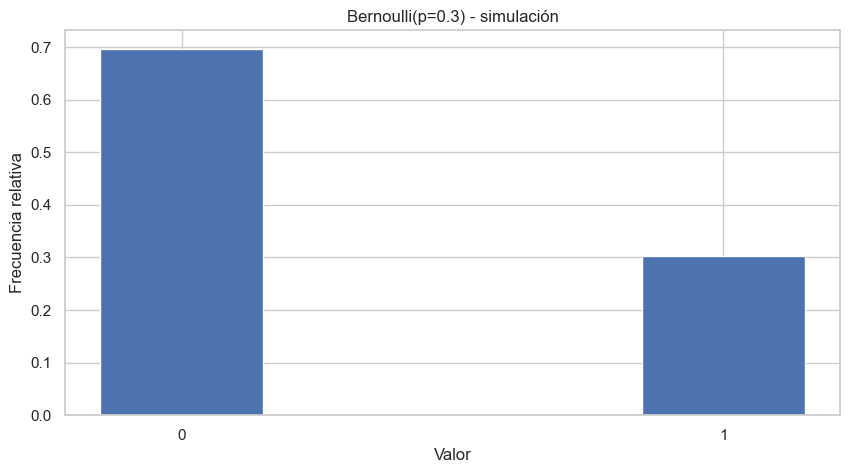

In [6]:
# Bernoulli: simulación y gráfico
p = 0.3
n = 1000
data = np.random.binomial(1, p, size=n)  # Bernoulli como Binomial(n=1)
vals, counts = np.unique(data, return_counts=True)
probs = counts / n

print("Frecuencias observadas:", dict(zip(vals, counts)))
print("Probabilidades empíricas:", dict(zip(vals, probs)))
print("Teórico: P(1)=p=", p)

# Gráfico
plt.figure(figsize=(10,5))
plt.bar(vals, probs, width=0.3, label='Empírico')
plt.xticks([0,1])
plt.xlabel('Valor')
plt.ylabel('Frecuencia relativa')
plt.title('Bernoulli(p=0.3) - simulación')
plt.show()

Para obtener más información acerca de esta distribución, favor de dar click en el enlace [Bernoulli](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)


### 2.2 Variable aleatoria Binomial con parámetros $n\in\mathbb{Z}_{+}$ y $p\in(0,1)$

Decimos que una variable aleatoria tiene una distribución Binomial con parámetros $n$ y $p$, si su función de densidad está dada por:

$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \binom{n}{x} p^x(1-p)^{n-x}, \quad \text{si } x\in \{0,1,2,\dots\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Obs** Los ensayos deben de ser independientes.

La esperanza y varianza: 
$$ \mathbb{E}[X] = np$$
y 
$$ \text{Var}(X) = np(1-p)$$


**Ejemplo** Una moneda justa se tira seis veces, donde la probabilidad de obtener sol es de $0.3$. Sea $X$ el número de veces que cae sol, entonces sabemos que $X$ tiene una distribución binomial con parámetros $n=6$ y $p=0.3$. Calcular:

- La probabilidad de que el número de soles sea 2:
$$\mathbb{P}(X=2) = \binom{6}{2}(0.3)^2 (1-0.3)^{6-2} = 0.3241$$

- La probabilidad de que el número de soles sea 3:
$$\mathbb{P}(X=3) = \binom{6}{3}(0.3)^3 (1-0.3)^{6-3} = 0.1852$$

- La probabilidad de que el número de soles sea mayor a 1 y menor o igual a 5: 
$$ \begin{align*} \mathbb{P}(1 < X \leq 5) &= \mathbb{P}(X=2) + \mathbb{P}(X=3) \mathbb{P}(X=4) + \mathbb{P}(X=5) \\
    &= 0.3241 + 0.1852 + \binom{6}{4}(0.3)^4 (1-p)^{6-4} + \binom{6}{5}(0.3)^5 (1-p)^{6-5}  \\
    &= 0.579 \end{align*} $$

Vamos a calcular probabilidades en Python, utilizando el atributo `.cfd`. Para más información, ver [Binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)
Sabemos que podemos calcular la siguiente porbabilidad,
$$ \mathbb{P}(1 < X \leq 5) = F_{X}(5) - F_{X}(1) $$

In [12]:
from scipy.stats import binom # distribución binomial

binom.cdf(5,6,0.3) # calcular la probabilidad de que haya 5 o menos éxitos en 6 ensayos
binom.cdf(1,6,0.3) # calcular la probabilidad de que haya 1 o menos éxitos en 6 ensayos
binom.cdf(5,6,0.3) - binom.cdf(1,6,0.3) # calcular la probabilidad de que haya más de 1 y hasta 5 éxitos en 6 ensayos

np.float64(0.5790960000000003)

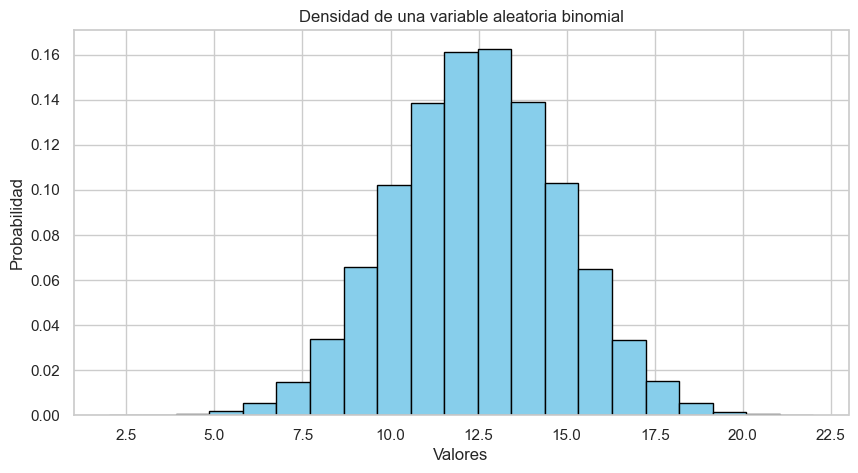

In [14]:
import numpy as np
import numpy.random as npr # para generar numeros aleatorios

import matplotlib.pyplot as plt # para crear gráficos
import random # para generar numeros aleatorios (módulo estándar de Python)

import scipy.stats as sps # para distribuciones discretas y continuas, pruebas estadísticas
#from scipy.stats import randint # para generar números enteros aleatorios (uniforme discreta)
# Distribución Binomial
n = 25 # número de ensayos Bernoulli
p = 0.5 # probabilidad de éxito en cada ensayo
s = 100000 # número de muestras aleatorias (simulaciones) a generar

# Vamos a generar números aleatorios con distribución binomial
binom_numeros = sps.binom.rvs(n, p, size=s)

# Creamos un histograma 
plt.figure(figsize=(10,5)) # tamaño de la figura
plt.hist(
    binom_numeros, 
    density=True, # normalizar el area para que sea una función de densidad
    bins=len(np.unique(binom_numeros)), # número de barras del histograma
    color='skyblue',
    edgecolor='black'
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Densidad de una variable aleatoria binomial')
plt.show() 

**Ejemplo:** Variable Aleatoria Binomial en control de calidad

En una fábrica, la probabilidad de que un producto sea defectuoso es $p = 0.1$.  
Se selecciona una muestra de $n = 20$ productos de manera independiente, y definimos la variable aleatoria $X$ como:

$$
X = \text{número de productos defectuosos en la muestra.}
$$

Entonces, $X$ sigue una distribución binomial con parámetros $n = 20$ y $p = 0.1$:  
$$
X \sim Binomial(n=20, p=0.1)
$$

**Función de probabilidad**

$$
P(X = k) = \binom{20}{k} (0.1)^k (0.9)^{20-k}, \quad k=0,1,2,\dots,20
$$


¿Cuál es la probabilidad de que haya exactamente $k=3$ defectuosos?

$$
P(X=3) = \binom{20}{3} (0.1)^3 (0.9)^{17}
$$

$$
P(X=3) = 1140 \times 0.001 \times 0.16677 \approx 0.190
$$

**Esperanza y Varianza**

$$
E[X] = np = 20 \times 0.1 = 2
$$

$$
\mathrm{Var}(X) = np(1-p) = 20 \times 0.1 \times 0.9 = 1.8
$$

En promedio se esperan $2$ productos defectuosos en cada muestra de $20$.  
Sin embargo, debido a la variabilidad, el resultado más probable en este caso es obtener $3$ defectuosos, con una probabilidad cercana al $19\%$.


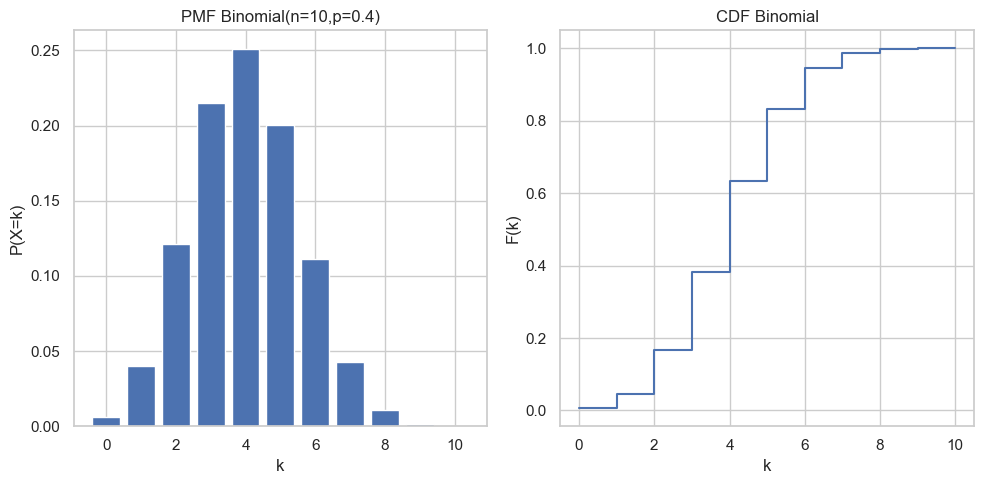

Esperanza, var: 4.0031 2.3750903899999996


In [16]:
# Binomial: pmf, cdf y simulación
n, p = 10, 0.4
k = np.arange(0, n+1)
pmf = st.binom.pmf(k, n, p)
cdf = st.binom.cdf(k, n, p)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(k, pmf)
plt.title('PMF Binomial(n=10,p=0.4)')
plt.xlabel('k'); plt.ylabel('P(X=k)')

plt.subplot(1,2,2)
plt.step(k, cdf, where='post')
plt.title('CDF Binomial')
plt.xlabel('k'); plt.ylabel('F(k)')
plt.tight_layout()
plt.show()

# Simulación
sim = np.random.binomial(n, p, size=10000)
print("Esperanza, var:", sim.mean(), sim.var())


### 2.3 Variable aleatoria Geométrica con parámetro $p\in (0,1)$.

Esta variable aleatoria cuenta el **número de fracasos antes del primer éxito** en ensayos bernoulli independientes con parámetro $0<p<1$, y su función de masa de probabilidades está dada por:
$$f_{X}(k)=\begin{cases}
	p(1-p)^{k-1} &\quad \text{si } k=1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$


Notación. $X\sim Geo(p)$

La cual es una función de densidad ya que:
* $0\le f_{X}(k)\le 1$ para toda $x$.
* $$\begin{align*} \sum_{k\in R_{X}}f_{X}(k) &= \sum_{k=1}^{\infty}(1-p)^{k-1}p \\ &= p\sum_{y=0}^{\infty} (1-p)^{y} \\ &= p\left(\frac{1}{1-(1-p)} \right) = 1 \end{align*}$$

Si por el contrario queremos contar el número de éxitos antes del primer fracaso, tenemos que la función de está dada por:
	$$f_{X}(k)=\begin{cases}
		p^{k}(1-p) &\quad \text{si } k=0,1,2,\dots \\
		\qquad 0 &\quad \text{en otro caso}  
	\end{cases}$$

y su esperanza y varianza son las siguientes:
$$\mathbb{E}[X^2]=p\frac{2}{p^3}-\frac{1}{p}=\frac{2}{p^2}-\frac{1}{p}.$$


$$\text{Var}(X)=\frac{2}{p^2}-\frac{1}{p}-\frac{1}{p^2}=\frac{1-p}{p^2}.$$

**Ejemplo** Variable Aleatoria Geométrica: Búsqueda de errores en un software
 
Un ingeniero de software realiza pruebas unitarias hasta encontrar el primer bug. La probabilidad de encontrar un bug en una prueba es $(p = 0.2)$. Sea $(X)$ la variable aleatoria que representa el número de pruebas necesarias para encontrar el primer bug.


1. Distribución de Probabilidad

La fórmula de la distribución geométrica es:

$$
P(X = k) = (1-p)^{k-1} \cdot p, \quad k = 1, 2, 3, \dots
$$

Calculemos las probabilidades para los primeros 5 intentos:

- $(P(X=1) = (1-0.2)^{1-1} \cdot 0.2 = 1 \cdot 0.2 = 0.2)$
- $(P(X=2) = (1-0.2)^{2-1} \cdot 0.2 = 0.8 \cdot 0.2 = 0.16)$  
- $(P(X=3) = (0.8)^{3-1} \cdot 0.2 = 0.64 \cdot 0.2 = 0.128)$  
- $(P(X=4) = (0.8)^3 \cdot 0.2 = 0.512 \cdot 0.2 = 0.1024)$  
- $(P(X=5) = (0.8)^4 \cdot 0.2 = 0.4096 \cdot 0.2 = 0.08192)$


| k | P(X=k) |
|---|---------|
| 1 | 0.2000 |
| 2 | 0.1600 |
| 3 | 0.1280 |
| 4 | 0.1024 |
| 5 | 0.0819 |


2. Esperanza 

La fórmula de la esperanza para una geométrica es:

$$
E[X] = \sum_{k=1}^{\infty} k \cdot P(X=k)
$$

Aproximando con los primeros 5 valores:

$$
E[X] \approx 1(0.2) + 2(0.16) + 3(0.128) + 4(0.1024) + 5(0.08192)
$$

$$
E[X] \approx 0.2 + 0.32 + 0.384 + 0.4096 + 0.4096 = 1.7232
$$

**Esperanza exacta:**

$$
E[X] = \frac{1}{p} = \frac{1}{0.2} = 5
$$

3. Varianza

La fórmula de la varianza:

$$
Var(X) = \frac{1-p}{p^2} = \frac{0.8}{0.2^2} = \frac{0.8}{0.04} = 20
$$



- En promedio, el ingeniero necesita **5 pruebas** para encontrar el primer bug.  
- La varianza indica que la cantidad de pruebas puede variar bastante, con un rango amplio alrededor de 5.


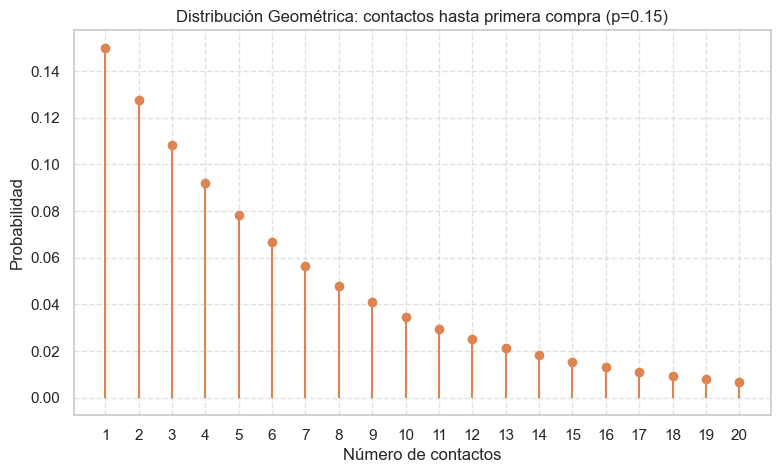

Esperanza: 6.67
Varianza: 37.78


In [13]:
#Ejemplo en Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Parámetro: probabilidad de éxito
p = 0.15  # Porcentaje de clientes que hacen una compra en el primer contacto

# Variable aleatoria: número de contactos hasta la primera compra
x = np.arange(1, 21)

# Función de masa de probabilidad
pmf = geom.pmf(x, p)

# Graficar
plt.figure(figsize=(9,5))
plt.stem(x, pmf, basefmt=" ", linefmt='C1-', markerfmt='C1o')
plt.title("Distribución Geométrica: contactos hasta primera compra (p=0.15)")
plt.xlabel("Número de contactos")
plt.ylabel("Probabilidad")
plt.xticks(x)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Esperanza y Varianza
esperanza = geom.mean(p)
varianza = geom.var(p)
print(f"Esperanza: {esperanza:.2f}")
print(f"Varianza: {varianza:.2f}")


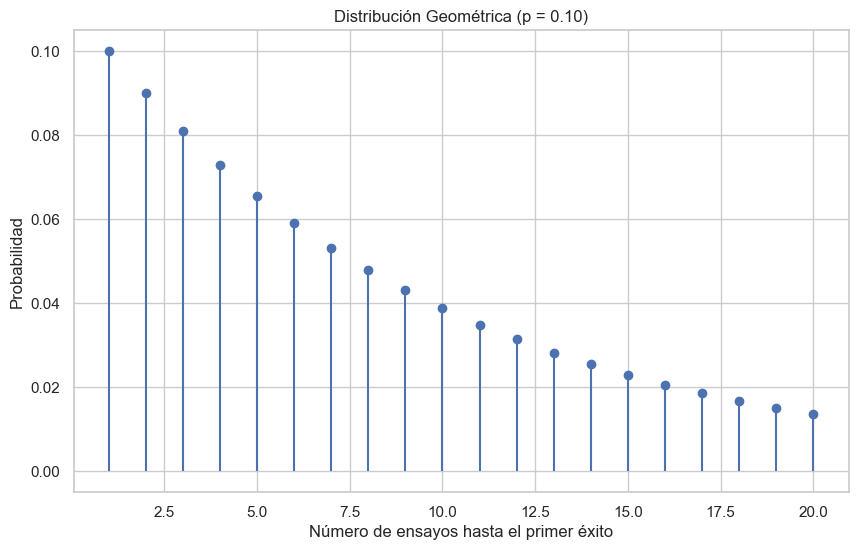

In [9]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt

#El parámetro de la distribución geometrica es:
p = 0.1

#Valores posibles (desde 1 hasta 20 ensayos):
x=np.arange(1, 21)

pmf = geom.pmf(x, p)

plt.figure(figsize=(10,6))
plt.stem(x, pmf, basefmt=" ") #Gráfica de barras verticales
plt.title('Distribución Geométrica (p = {:.2f})'.format(p))
plt.xlabel('Número de ensayos hasta el primer éxito')
plt.ylabel('Probabilidad')
plt.show()

### 2.4 Variable aleatoria Poisson
Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, volumén, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notación:** $X\sim \text{Poi}(\lambda)$.

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$.

**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$,
- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} = \frac{0.3233}{0.8646} = 0.3739
       \end{align*} $$

Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores. Y también graficar la función de densidad.


**Ejemplo:** Variable Aleatoria Poisson

En un centro de llamadas, el número de llamadas que llegan por minuto sigue, en promedio, un valor de $\lambda = 5$.  
Definimos la variable aleatoria $Y$ como:

$$
Y = \text{número de llamadas recibidas en un minuto.}
$$

Entonces, $Y$ sigue una distribución \textbf{Poisson} con parámetro $\lambda = 5$:  
$$
Y \sim Poisson(\lambda=5)
$$

**Función de probabilidad**

La función de probabilidad de la distribución Poisson es:

$$
P(Y = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0,1,2,\dots
$$

Para $\lambda=5$:

$$
P(Y = k) = \frac{e^{-5} \cdot 5^k}{k!}
$$

**Cálculo**

¿Cuál es la probabilidad de recibir exactamente $k=3$ llamadas en un minuto?

$$
P(Y=3) = \frac{e^{-5} \cdot 5^3}{3!}
$$

$$
P(Y=3) = \frac{e^{-5} \cdot 125}{6} \approx 0.1404
$$

**Esperanza y Varianza**

En la distribución Poisson, la esperanza y la varianza coinciden:

$$
E[Y] = \lambda = 5
$$

$$
\mathrm{Var}(Y) = \lambda = 5
$$


En promedio, se esperan $5$ llamadas por minuto en el centro de atención.  
El cálculo muestra que la probabilidad de recibir exactamente $3$ llamadas en un minuto es de aproximadamente $14\%$.


In [17]:
from scipy.stats import poisson

# Parámetro de la Poisson
lam = 2

# --- Probabilidades ---

# P(X > 2) = 1 - P(X <= 2) = 1 - CDF(2)
p_mayor2 = 1 - poisson.cdf(2, lam)

# P(X > 2 | X >= 1) = P(X > 2) / P(X >= 1)
p_condicional = p_mayor2 / (1 - poisson.cdf(0, lam))

print("Modelamos el número de accidentes diarios como una Poisson(λ=2), es decir, en promedio ocurren 2 accidentes al día.\n")
print("Cálculamos que la probabilidad de que ocurran más de 2 accidentes en un día es: ", f"P(X > 2) = {p_mayor2:.4f}\n")

print("Si sabemos que ocurre al menos 1 accidente, entonces la probabilidad de que ocurran más de 2 sube a: \n")
print(f"P(X > 2 | X >= 1) = {p_condicional:.4f}")

Modelamos el número de accidentes diarios como una Poisson(λ=2), es decir, en promedio ocurren 2 accidentes al día.

Cálculamos que la probabilidad de que ocurran más de 2 accidentes en un día es:  P(X > 2) = 0.3233

Si sabemos que ocurre al menos 1 accidente, entonces la probabilidad de que ocurran más de 2 sube a: 

P(X > 2 | X >= 1) = 0.3739


El gráfico muestra cómo se distribuyen las probabilidades para 0, 1, 2, … n-accidentes, donde los valores más probables son justamente 1 y 2, y después la probabilidad cae rápidamente.


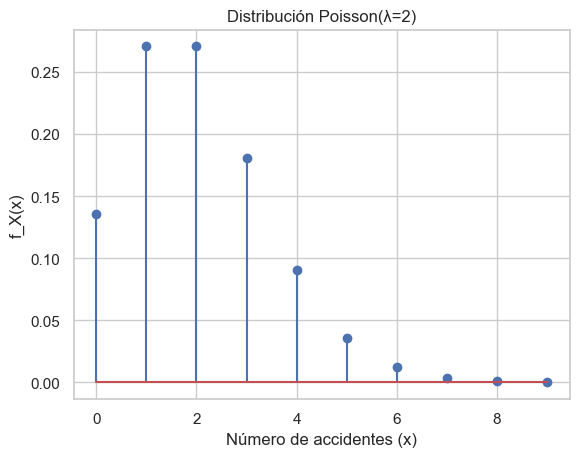

In [18]:
# --- Gráfica de la función de densidad (pmf) ---
# Valores de x a graficar
x = np.arange(0, 10)  # suficientes valores para ver la distribución
pmf = poisson.pmf(x, lam)
print("El gráfico muestra cómo se distribuyen las probabilidades para 0, 1, 2, … n-accidentes, donde los valores más probables son justamente 1 y 2, y después la probabilidad cae rápidamente.")

plt.stem(x, pmf)
plt.xlabel("Número de accidentes (x)")
plt.ylabel("f_X(x)")
plt.title(f"Distribución Poisson(λ={lam})")
plt.show()

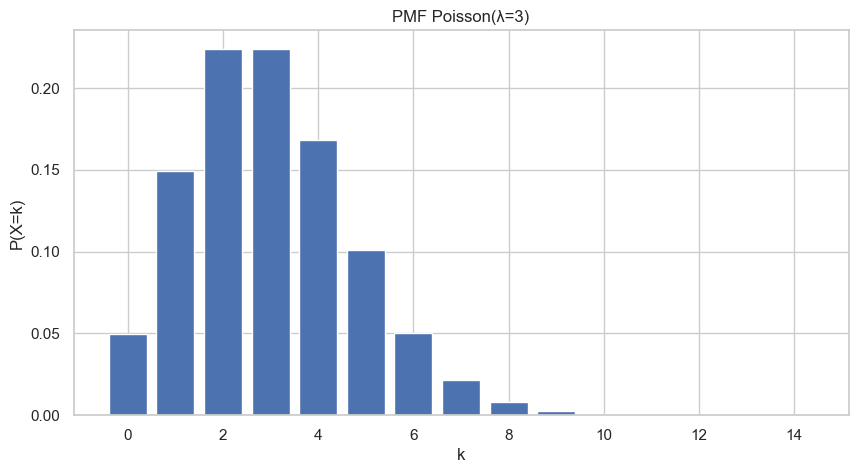

Empírico mean,var: 3.0175 3.05219375 Teórico λ: 3.0


In [20]:
# Poisson
lam = 3.0
k = np.arange(0, 15)
pmf = st.poisson.pmf(k, lam)

plt.figure(figsize=(10,5))
plt.bar(k, pmf)
plt.title('PMF Poisson(λ=3)')
plt.xlabel('k'); plt.ylabel('P(X=k)')
plt.show()

sim = np.random.poisson(lam, size=10000)
print("Empírico mean,var:", sim.mean(), sim.var(), "Teórico λ:", lam)

### 2.5 Variable aleatoria Binomial Negativa con parámetros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un éxito, hasta obtener un total de $r$ éxitos acumulados. Sea $X$ el número de ensayos que se requieren, entonces su función de masa de probabilidades está dada por:
$$f_{X}(k)=\begin{cases}
	\binom{k-1}{r-1}p^{r}(1-p)^{k-r} &\quad \text{si } k=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$



Notación. $X\sim \text{BN}(r,p)$.

Se tiene que
$$\mathbb{E}[X]=\frac{r}{p}$$
y
$$\text{Var}[X]=\frac{r(1-p)}{p^2}.$$


**Ejemplo:** Variable Aleatoria Binomial Negativa en ventas

Un vendedor realiza llamadas telefónicas para ofrecer un producto.  
La probabilidad de éxito en cada llamada (es decir, concretar una venta) es $p = 0.2$.  

Definimos la variable aleatoria $X$ como:

$$
X = \text{número de llamadas necesarias para conseguir $r=4$ ventas.}
$$

Entonces, $X \sim \text{Binomial Negativa}(r=4, p=0.2)$.

**Función de probabilidad**

$$
P(X = k) = \binom{k-1}{r-1} p^r (1-p)^{k-r}, \quad k=r,r+1,\dots
$$

Para este caso:

$$P(X=k) = \binom{k-1}{3} (0.2)^4 (0.8)^{k-4}$$


¿Cuál es la probabilidad de que el vendedor consiga la cuarta venta en la llamada número $k=10$?

$$
P(X=10) = \binom{9}{3} (0.2)^4 (0.8)^6
$$

$$
P(X=10) = 84 \cdot 0.0016 \cdot 0.262144 \approx 0.0353
$$

**Esperanza y Varianza**


$$E[X] = \frac{r}{p} = \frac{4}{0.2} = 20$$


$$\mathrm{Var}(X) = \frac{r(1-p)}{p^2} = \frac{4 \cdot 0.8}{0.2^2} = 80$$


En promedio, el vendedor necesitará $20$ llamadas para conseguir 4 ventas.  
La probabilidad de que consiga exactamente la cuarta venta en la llamada número 10 es de aproximadamente $3.5\%$.


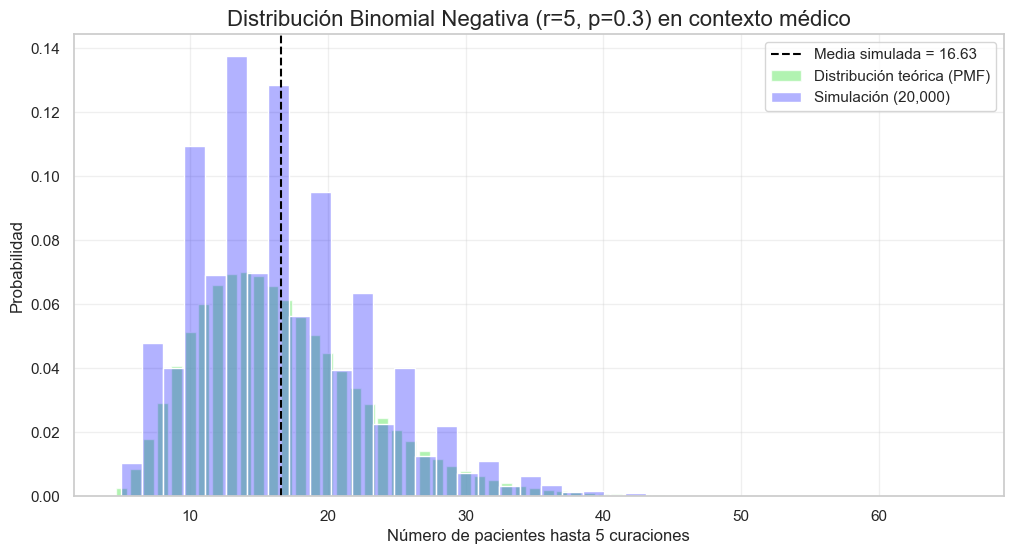

Estadísticos de la Binomial Negativa (r=5, p=0.3)
Media teórica: 16.67
Varianza teórica: 38.89
Media simulada: 16.63
Varianza simulada: 38.01


In [14]:
# Ejemplo: Distribución Binomial Negativa en un contexto médico en Python
# -------------------------------------------------------------
# Contexto: probabilidad de curación p=0.3
# Número de éxitos deseados r=5 (pacientes curados)
# Variable: número de pacientes necesarios hasta obtener esas 5 curaciones

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom

# Parámetros
r = 5       # número de curaciones deseadas
p = 0.3     # probabilidad de éxito (curación)
q = 1 - p

# Rango de valores posibles
k = np.arange(r, r+40)  # desde 5 hasta 44 pacientes

# Función de probabilidad (PMF)
pmf = nbinom.pmf(k-r, r, p)   # en scipy: X = fracasos antes de r éxitos

# Simulación de 20,000 ensayos
sim_data = nbinom.rvs(r, p, size=20000) + r  # sumamos r para total de pacientes

# -------------------------------------------------------------
# Gráfica
# -------------------------------------------------------------
plt.figure(figsize=(12,6))

# Distribución teórica
plt.bar(k, pmf, color="lightgreen", alpha=0.7, label="Distribución teórica (PMF)")

# Simulación
sns.histplot(sim_data, stat="probability", bins=40, color="blue", alpha=0.3, label="Simulación (20,000)")

# Media
plt.axvline(np.mean(sim_data), color="black", linestyle="--", label=f"Media simulada = {np.mean(sim_data):.2f}")

plt.title("Distribución Binomial Negativa (r=5, p=0.3) en contexto médico", fontsize=16)
plt.xlabel("Número de pacientes hasta 5 curaciones")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -------------------------------------------------------------
# Estadísticos teóricos y simulados
# -------------------------------------------------------------
mean_theoretical = r / p
var_theoretical = r * (1-p) / p**2

print("Estadísticos de la Binomial Negativa (r=5, p=0.3)")
print(f"Media teórica: {mean_theoretical:.2f}")
print(f"Varianza teórica: {var_theoretical:.2f}")
print(f"Media simulada: {np.mean(sim_data):.2f}")
print(f"Varianza simulada: {np.var(sim_data):.2f}")


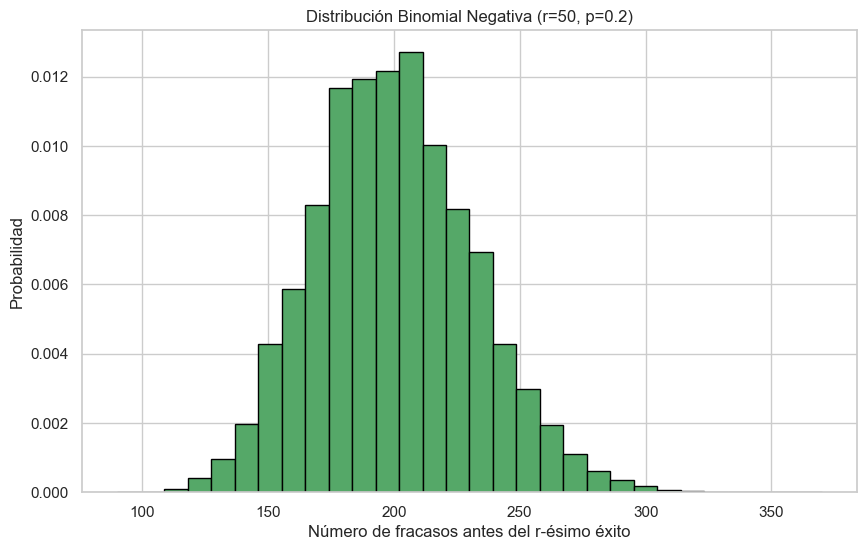

In [ ]:
# Otro ejemplo:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sps
import random

r = 50  #número de éxitos
p = 0.2 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla

#Vamos a generar numeros aleatorios con una distribución binomial negativa
nbinom_numeros = sps.nbinom.rvs(r,p,size=s) #números aleatorios  

#Generamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    bins=30,
    density=True, # Normaliza el area para que sea 1
    color = "g",
    edgecolor="black" 
)

plt.xlabel('Número de fracasos antes del r-ésimo éxito')
plt.ylabel('Probabilidad')
plt.title('Distribución Binomial Negativa (r={}, p={})'.format(r,p))
plt.show() #mostrar el gráfica

### 2.6 Variable aleatoria Hipergeométrica con parámetros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de bolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$f_{X}(i)=
	\frac{\binom{m}{i}\binom{N-m}{n-i}}{\binom{N}{n}} \quad \text{si } i=0,1,\dots, n  
$$



Notación. $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$\mathbb{E}[X]=\frac{nm}{N}$$
y
$$\text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $i\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ e $i$:
$$\mathbb{P}(X=i)\approx \binom{n}{i}p^{i}(1-p)^{n-i}.$$

Si $n/N < 5\%$ entonces mi aproximación es menor


**Ejemplo** Variable aleatoria Hipergeométrica

Una urna contiene **20 pelotas**, de las cuales **8 son rojas** y **12 son azules**.  
Se extraen **5 pelotas sin reemplazo**.  

Sea la variable aleatoria:

$$
X = \text{número de pelotas rojas extraídas}
$$

- Población total: \(N = 20\)  
- Éxitos en la población: \(K = 8\) (pelotas rojas)  
- Tamaño de la muestra: \(n = 5\)  
- Éxitos en la muestra: \(X \sim H(N=20, K=8, n=5)\)  

La función de probabilidad (PMF) es:

$$
P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}, \quad k = 0,1,\dots,n
$$

¿Cuál es la probabilidad de obtener exactamente **2 pelotas rojas**?

$$
P(X=2) = \frac{\binom{8}{2}\binom{12}{3}}{\binom{20}{5}}
$$

$$
= \frac{28 \cdot 220}{15504} \approx 0.397
$$

Entonces, hay un 39.7% de probabilidad de obtener exactamente 2 pelotas rojas en la muestra.

**Esperanza y Varianza**

La esperanza de una variable hipergeométrica es:

$$
\mathbb{E}[X] = n \cdot \frac{K}{N}
$$

En este caso:

$$
\mathbb{E}[X] = 5 \cdot \frac{8}{20} = 2
$$


La varianza de una variable hipergeométrica es:

$$
\mathrm{Var}(X) = n \cdot \frac{K}{N} \cdot \left(1 - \frac{K}{N}\right) \cdot \frac{N-n}{N-1}
$$

Sustituyendo:

$$
\mathrm{Var}(X) = 5 \cdot \frac{8}{20} \cdot \frac{12}{20} \cdot \frac{15}{19}
$$

$$
= 5 \cdot 0.4 \cdot 0.6 \cdot 0.789 \approx 0.95
$$



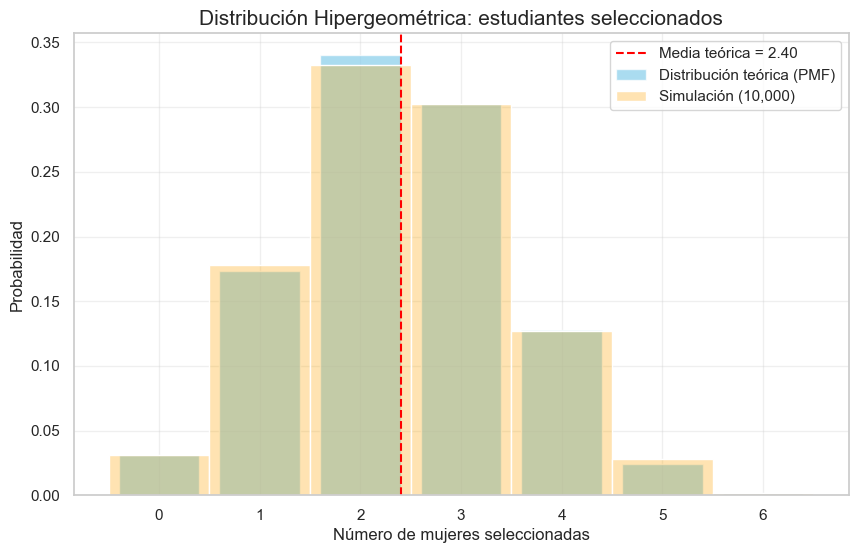

📊 Estadísticos de la Hipergeométrica
Media teórica: 2.40
Varianza teórica: 1.19
Media simulada: 2.41
Varianza simulada: 1.23


In [8]:
# Ejemplo: Distribución Hipergeométrica en python
# --------------------------------------
# Contexto: De una clase con 30 estudiantes, 12 son mujeres y 18 son hombres.
# Se seleccionan al azar 6 estudiantes sin reemplazo.
# Variable: número de mujeres seleccionadas.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hypergeom

# Parámetros
N = 30   # población total
K = 12   # número de mujeres (éxitos)
n = 6    # tamaño de muestra

# Valores posibles de X
x = np.arange(0, n+1)

# PMF
pmf = hypergeom.pmf(x, N, K, n)

# Simulación
sim_data = hypergeom.rvs(N, K, n, size=10000)

# --------------------------------------
# Gráfica
# --------------------------------------
plt.figure(figsize=(10,6))

# Teórico
plt.bar(x, pmf, color="skyblue", alpha=0.7, label="Distribución teórica (PMF)")

# Simulado
sns.histplot(sim_data, stat="probability", bins=np.arange(-0.5, n+1.5, 1),
             color="orange", alpha=0.3, label="Simulación (10,000)")

# Media teórica
mean_theoretical = n * (K / N)
plt.axvline(mean_theoretical, color="red", linestyle="--", label=f"Media teórica = {mean_theoretical:.2f}")

plt.title("Distribución Hipergeométrica: estudiantes seleccionados", fontsize=15)
plt.xlabel("Número de mujeres seleccionadas")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------------------
# Estadísticos
# --------------------------------------
var_theoretical = n * (K/N) * (1-K/N) * ( (N-n)/(N-1) )

print("📊 Estadísticos de la Hipergeométrica")
print(f"Media teórica: {mean_theoretical:.2f}")
print(f"Varianza teórica: {var_theoretical:.2f}")
print(f"Media simulada: {np.mean(sim_data):.2f}")
print(f"Varianza simulada: {np.var(sim_data):.2f}")


### 2.7 Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_{1},\dots,x_{n}\}$ si su función de masa de probabilidades está dada por
$$f_{X}(k)=\mathbb{P}(X=k)=\begin{cases}
\frac{1}{n} &\quad \text{si } k\in\{x_{1},\dots,x_{n}\} \\
0 &\quad \text{en otro caso}
\end{cases}$$

**Notación:** $X\sim Unif(x_{1},\dots,x_{n}).$

Se llama uniforme porque cada uno de los posibles valores de $X$ tienen la misma probabilidad.

Si $X\sim Unif(x_{1},\dots,x_{n})$, en este caso, se tiene:
	$$\mathbb{E}[X] = \sum_{k}kf_{X}(k)=\frac{x_n + x_1}{2}.$$
	y
	$$\text{Var}(X) = \mathbb{E}[(X-\mathbb{E}[X])^{2}] =\sum_{k}(k-\mathbb{E}[X])^{2}f_{X}(k)=\frac{(x_n - x_1+1)^2-1}{12}$$

**Ejemplo** Variable Aleatoria Uniforme Discreta: Selección de estudiante al azar

En una clase hay 8 estudiantes numerados del 1 al 8. Se selecciona un estudiante al azar para presentar un proyecto. Sea $(X)$ la variable aleatoria que representa el número del estudiante seleccionado.

1. Distribución de Probabilidad

Como todos los estudiantes tienen la misma probabilidad de ser elegidos:

$$
P(X=x) = \frac{1}{n}, \quad x \in \{1,2,3,4,5,6,7,8\}, \quad n=8
$$

$$
P(X=1) = P(X=2) = \dots = P(X=8) = \frac{1}{8} = 0.125
$$


| x | P(X=x) |
|---|--------|
| 1 | 0.125 |
| 2 | 0.125 |
| 3 | 0.125 |
| 4 | 0.125 |
| 5 | 0.125 |
| 6 | 0.125 |
| 7 | 0.125 |
| 8 | 0.125 |


2. Esperanza

La fórmula de la esperanza para una uniforme discreta:

$$
E[X] = \frac{a+b}{2}
$$

Aquí $(a=1, b=8):$

$$
E[X] = \frac{1+8}{2} = \frac{9}{2} = 4.5
$$

También podemos calcularla sumando todos los valores multiplicados por su probabilidad:

$$
E[X] = 1(0.125) + 2(0.125) + 3(0.125) + \dots + 8(0.125)
$$

$$
E[X] = 0.125(1+2+3+4+5+6+7+8) = 0.125 \cdot 36 = 4.5$$


3. Varianza

Fórmula de la varianza para uniforme discreta:

$$
Var(X) = \frac{(b-a+1)^2 - 1}{12}
$$

$$
Var(X) = \frac{(8-1+1)^2 - 1}{12} = \frac{64-1}{12} = \frac{63}{12} = 5.25
$$


- En promedio, el estudiante seleccionado tiene número **4.5**, lo que refleja el valor medio de todos los números posibles.  
- La varianza indica que los números elegidos pueden variar en promedio alrededor de 5 unidades cuadradas de dispersión.


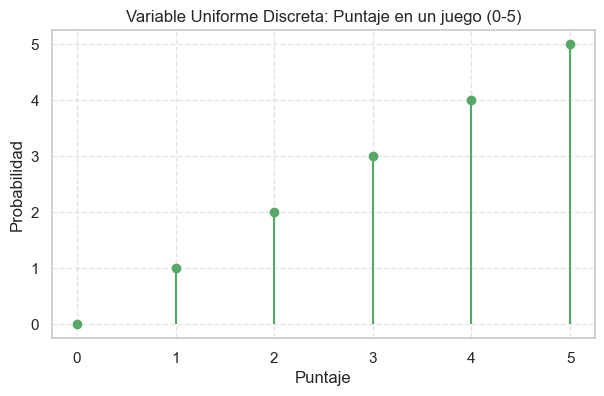

Esperanza: 2.5
Varianza: 2.9166666666666665


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Variable uniforme discreta: puntaje en un juego (0 a 5)
valores = np.arange(0, 6)
prob = np.ones_like(valores)/len(valores)

# Graficar
plt.figure(figsize=(7,4))
plt.stem(valores, basefmt=" ", linefmt='C2-', markerfmt='C2o')
plt.title("Variable Uniforme Discreta: Puntaje en un juego (0-5)")
plt.xlabel("Puntaje")
plt.ylabel("Probabilidad")
plt.xticks(valores)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Esperanza y varianza
esperanza = np.mean(valores)
varianza = np.var(valores, ddof=0)
print(f"Esperanza: {esperanza}")
print(f"Varianza: {varianza}")


## 3. Variables Aleatorias Continuas

**Definición.** Una variable aleatoria absolutamente continua es aquella para la cual existe una función $f_X$ no negativa, llamada función de densidad, tal que:
$$
F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x} f_X(y) dy, \quad x\in \mathbb{R}
$$

**Lema.** Sea $F_X$ una función de distribución. Supongamos que $F_X$ es derivable y que su derivada es continua en $(a, b)$, donde:
$ a = \inf \{ x \in \mathbb{R} \mid F_X(x) > 0 \}, \quad b = \sup \{ x \in \mathbb{R} \mid F_X(x) < 1 \}$
entonces, la función de densidad se puede obtener como:
$$ f_X(x) =
\begin{cases} 
F'_X(x), & \text{si } x \in (a, b), \\
0, & \text{e.o.c.}
\end{cases}$$

Es decir,
$$ \frac{dF_X(x)}{dx} = f_X(x)$$

### 3.1 Variable aleatoria uniforme sobre el intervalo $(a,b)$.

Una variable aleatoria $X$ se dice que tiene distribución uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribución uniforme continua en $(a,b)$ es simétrica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gráficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La función de distribución de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

**Ejemplo** de una variable aleatoria Uniforme Continua

Un autobús llega a una estación **en cualquier momento entre las 8:00 y las 8:30 AM**.  
Si un pasajero llega exactamente a las 8:00, el tiempo de espera (en minutos) es una variable aleatoria:

$$
X \sim U(a=0, b=30)
$$

**Definición** de la función de densidad

La función de densidad de probabilidad (PDF) de una uniforme continua es:

$$
f(x) =
\begin{cases}
\frac{1}{b-a}, & a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

En este caso:

$$
f(x) =
\begin{cases}
\frac{1}{30}, & 0 \leq x \leq 30 \\
0, & \text{otro caso}
\end{cases}
$$

Probabilidad de esperar entre 5 y 10 minutos

$$
P(5 \leq X \leq 10) = \int_5^{10} \frac{1}{30}\, dx = \frac{10-5}{30} = \frac{5}{30} \approx 0.167
$$

Hay un **16.7% de probabilidad** de que el pasajero espere entre 5 y 10 minutos.

**Esperanza y Varianza**

La esperanza de $(X \sim U(a,b))$ es:

$$
\mathbb{E}[X] = \frac{a+b}{2} = \frac{0+30}{2} = 15
$$

La varianza es:

$$
\mathrm{Var}(X) = \frac{(b-a)^2}{12} = \frac{30^2}{12} = 75
$$


**Entonces**
- $(P(5 \leq X \leq 10) \approx 0.167)$  
- $(E[X] = 15)$
- $(\mathrm{Var}(X) = 75)$  


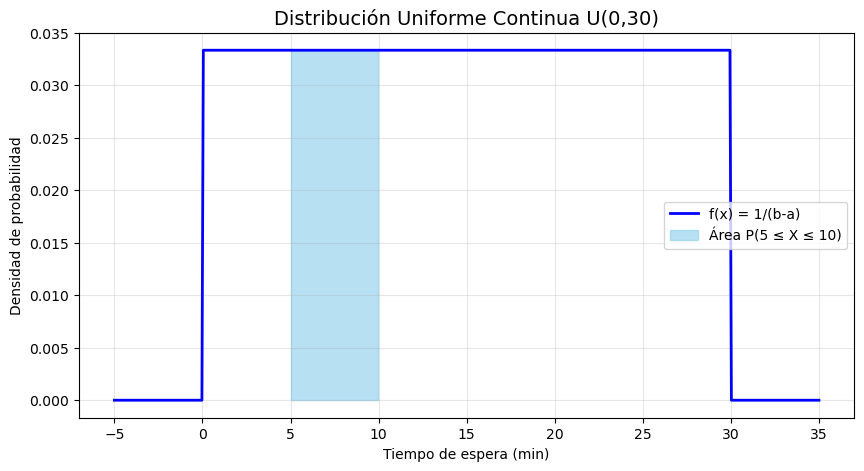

Resultados de la distribución U(0,30)
P(5 ≤ X ≤ 10) = 0.167
Esperanza teórica: 15.00
Varianza teórica: 75.00


In [2]:
# Ejemplo: Distribución Uniforme Continua
# Contexto: Tiempo de espera de un autobús entre 0 y 30 minutos.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Parámetros
a, b = 0, 30  # intervalo [0,30]
X = uniform(loc=a, scale=b-a)

# Rango de valores
x = np.linspace(a-5, b+5, 500)
pdf = X.pdf(x)

# Probabilidad entre 5 y 10
p_5_10 = X.cdf(10) - X.cdf(5)

# --------------------------------------
# Gráfica de la densidad
# --------------------------------------
plt.figure(figsize=(10,5))
plt.plot(x, pdf, "b-", lw=2, label="f(x) = 1/(b-a)")
plt.fill_between(x, 0, pdf, where=(x>=5)&(x<=10), color="skyblue", alpha=0.6, label="Área P(5 ≤ X ≤ 10)")
plt.title("Distribución Uniforme Continua U(0,30)", fontsize=14)
plt.xlabel("Tiempo de espera (min)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------------------
# Resultados
# --------------------------------------
print(f"Resultados de la distribución U(0,30)")
print(f"P(5 ≤ X ≤ 10) = {p_5_10:.3f}")
print(f"Esperanza teórica: {(a+b)/2:.2f}")
print(f"Varianza teórica: {((b-a)**2)/12:.2f}")


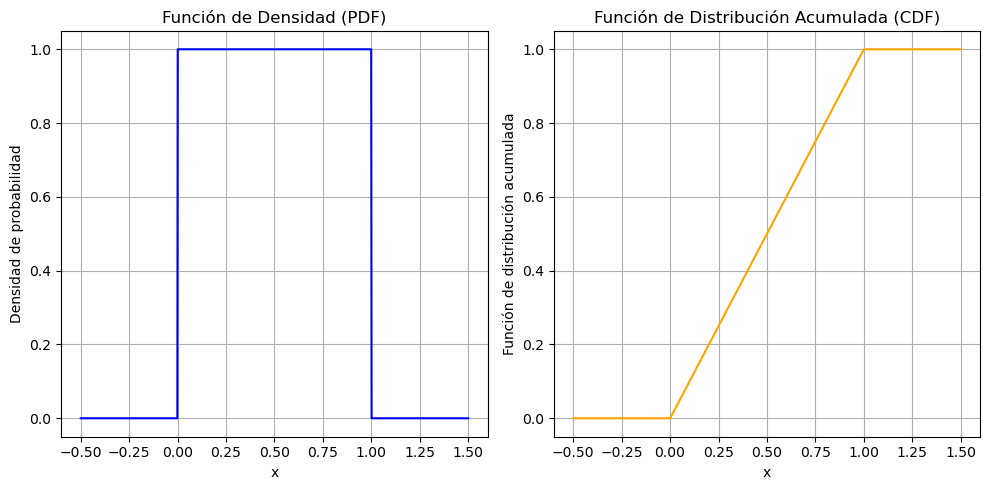

In [3]:
# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Definimos las funciones de densidad y distribución
# Función de densidad (pdf) de la distribución uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))
    
# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función densidad 
pdf_values = uniform_pdf(x, a, b)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.2 Variable aleatoria normal con parámetros media $\mu$ y varianza $\sigma^{2}$.

La distribución normal es una de las más importantes y de mayor uso tanto en la teoría de la probabilidad, como en la teoría estadística.

También llamada distribución gaussiana, en honor a Gauss, a quien se considera el padre de ésta distribución.

La importancia de la distribución normal, radica en el famoso Teorema central del límite. Fue descubierta por De Moivre en 1733 como un límite de la distribución binomial.


La importancia de esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos, por ejemplo:
* Estatura
* Efectos de un fármaco
* Consumo de cierto producto por un grupo de individuos
* Coeficiente intelectual
* Nivel de ruido en telecomunicaciones
* Errores cometidos al medir ciertas magnitudes

Además, esta distribución juega un papel de suma importancia en la inferencia estadística.

Se dice que la variable aleatoria $X$ tiene distribución normal de parámetros $\mu$ y $\sigma^{2}$, donde $\mu,\sigma\in\mathbb{R}$ y $\sigma>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} &\quad \text{si }  x \in\mathbb{R} \\
	\qquad 0 &\quad \text{e.o.c}  
\end{cases}$$

**Notación.** $X\sim N(\mu,\sigma^{2})$


Tal curva (**la campana de Gauss-Bell**) es una función que depende de los parámetros $\mu$ y $\sigma^{2}$.


**Observación:** El parámetro $\mu$ se llama *media* y el  parámetro $\sigma^{2}$ se llama *varianza*.

La función de densidad definida anteriormente es efecto función de densidad, ya que
$$\int_{\mathbb{R}}f_{X}(x)dx = \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-m)^{2}}{2\sigma^{2}}}  = 1 $$

Variable aleatoria normal con parámetros  0  y  1 .
La ley de $Z\sim N(0,1)$ está dada por la función de densidad
$$
f_{Z}(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}},
$$
para $z\in \mathbb{R}$.

Sabemos que:
* La varianza es usada como una medida para comparar la dispersión en dos o más conjuntos de observaciones.
* Una desviación estándar pequeña indica que los valores de la variable aleatoria se encuentran cercanos a la media.
* Una desviación estándar grande indica que los valores de la variable aleatoria se dispersan mucho con respecto a la media.

La función de distribución de una variable aleatoria $X\sim N(\mu,\sigma^{2})$ está dada por:
$$F_{X}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy$$

Esta nos proporciona la probabilidad de que $X$ tome calores menores o iguales a un valor específico $x$, y corresponde al área bajo la curva en el intervalo $(-\infty,x]$:

No es sencillo calcular $F_{X}(x)$, pero cualquier v.a. gaussiana puede transformarse a una v.a. estandarizada. Existen tablas para esta v.a., lo cual hace los cálculos más fáciles.


**Ejemplo** de una variable aleatoria Normal

La estatura de los adultos en una ciudad sigue aproximadamente una distribución normal con:

$$
X \sim N(\mu = 170, \sigma^2 = 9)
$$

donde:
- $(\mu = 170 \, \text{cm})$ es la media,
- $(\sigma^2 = 9 \, \text{cm}^2)$ es la varianza, y por tanto \(\sigma = 3 \, \text{cm}\).

Función de densidad (PDF)
La función de densidad de probabilidad de una normal es:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Probabilidad de que una persona mida entre 167 y 173 cm

$$
P(167 \leq X \leq 173) = \Phi\left(\frac{173-170}{3}\right) - \Phi\left(\frac{167-170}{3}\right)
$$

donde $(\Phi(z))$ es la función de distribución acumulada de la normal estándar.

$$
= \Phi(1) - \Phi(-1) \approx 0.8413 - 0.1587 = 0.6826
$$

Hay aproximadamente un **68.3% de probabilidad** de que una persona mida entre 167 y 173 cm.

Esperanza y Varianza
- $(\mathbb{E}[X] = \mu = 170)$  
- $(\mathrm{Var}(X) = \sigma^2 = 9$)

✅ La distribución normal tiene simetría alrededor de su media.


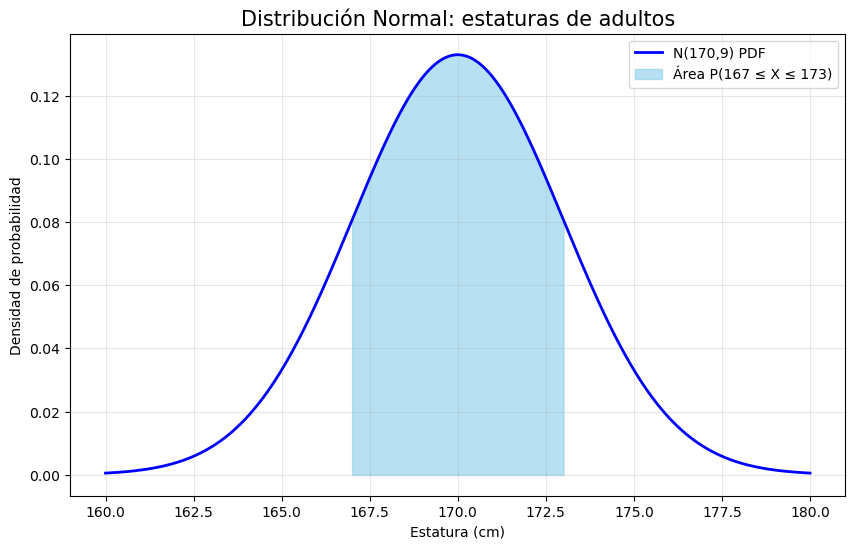

📊 Resultados de la distribución normal N(170, 9)
P(167 ≤ X ≤ 173) = 0.683
Esperanza: 170
Varianza: 9


In [4]:
# Ejemplo: Distribución Normal
# ---------------------------------------
# Contexto: Estaturas ~ N(170, 3^2)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
mu, sigma = 170, 3
X = norm(loc=mu, scale=sigma)

# Rango de valores
x = np.linspace(160, 180, 500)
pdf = X.pdf(x)

# Probabilidad entre 167 y 173
p_167_173 = X.cdf(173) - X.cdf(167)

# --------------------------------------
# Gráfica
# --------------------------------------
plt.figure(figsize=(10,6))
plt.plot(x, pdf, "b-", lw=2, label=f"N({mu},{sigma**2}) PDF")

# Resaltamos área entre 167 y 173
x_fill = np.linspace(167, 173, 200)
plt.fill_between(x_fill, 0, X.pdf(x_fill), color="skyblue", alpha=0.6, label="Área P(167 ≤ X ≤ 173)")

plt.title("Distribución Normal: estaturas de adultos", fontsize=15)
plt.xlabel("Estatura (cm)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------------------
# Resultados
# --------------------------------------
print("📊 Resultados de la distribución normal N(170, 9)")
print(f"P(167 ≤ X ≤ 173) = {p_167_173:.3f}")
print(f"Esperanza: {mu}")
print(f"Varianza: {sigma**2}")


Propiedades de la función de densidad de probabilidades de una distribución normal estándar:

1. Es positiva: $f(x)\geq 0$ para todo $x$ real.
2. Es continua y derivable en todas partes.
3. Es simétrica alrededor de $\mu$.
4. Conforme $x$ toma valores muy grandes de manera positiva y negativa, la función decrece hacia cero muy rápidamente.
5. Tiene un máximo global.
6. El área total bajo la curva es igual a $1$.

Veamos el comportamiento de la función conforme se cambia la varianza.

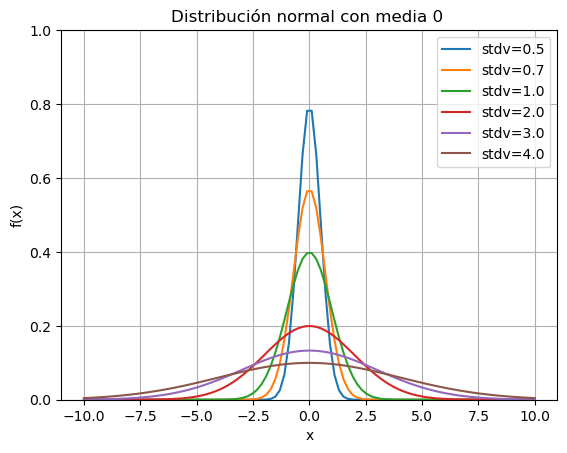

In [5]:
from scipy.stats import norm
fig, ax = plt.subplots()
x = np.linspace(-10,10,100) #valores de x entre -10  y 10 (funciona como el dominio de la función)
stdvs = [0.5, 0.7, 1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Distribución normal con media 0 ')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,1)
ax.grid(True)

Veamos el comportamiento de la función conforme se cambia la media.

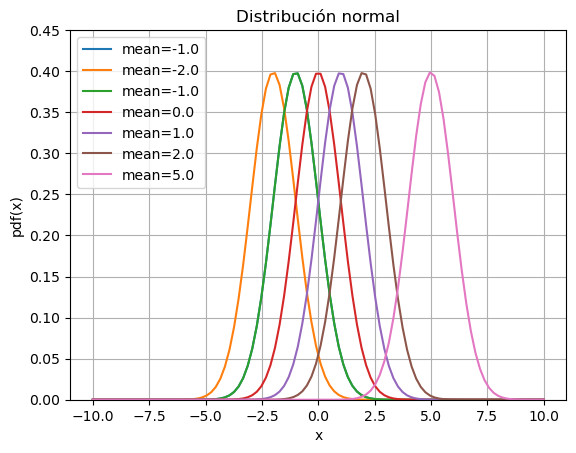

In [6]:
from scipy.stats import norm
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [-1.0,-2.0, -1.0, 0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Distribución normal')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### Función de distribución acumulativa de una normal $N(\mu,\sigma^2)$.

Gracias a las propiedades anteriores, es posible calcular áreas delimitadas de la función $f$. Si $a$ y $b$ son reales cualesquiera, denotaremos por
$$P(a\leq X\leq b),$$
la probabilidad de que $X$ esté en el intervalo $[a,b]$, al área bajo la curva de $f(x)$ sobre el intervalo $[a,b]$.

También, $P(X\leq x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(-\infty,x)$ y $P(X>x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(x, \infty)$.
A la probabilidad $\text{cdf}(x):=P(X\leq x)$ se llama la distribución acumulativa (hasta el valor $x$) de $f(x)$.

Con la notación anterior,
$$P(a\leq X\leq b)=\text{cdf}(b)-\text{cdf}(a)$$
y
$$\text{sf}(a):=P(X>a)=1-\text{cdf}(a).$$


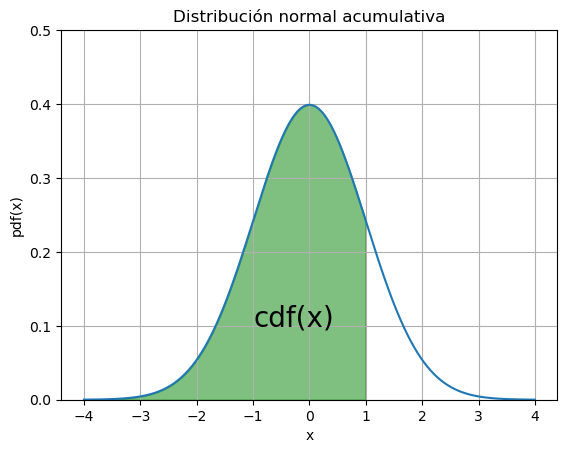

In [7]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Distribución normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

### Cálculo de probabilidades de una distribución normal

Calculemos $\text{cdf}(2)=\mathbb{P}(X<2)$ cuando $X\sim N(3,2^2)$.
$$Z = \frac{X-\mu}{\sqrt{\sigma^2}} \sim N(0,1)$$

In [8]:
norm.cdf(x=2, loc=3, scale=2) #v.a. con media=3 y st=2

np.float64(0.3085375387259869)

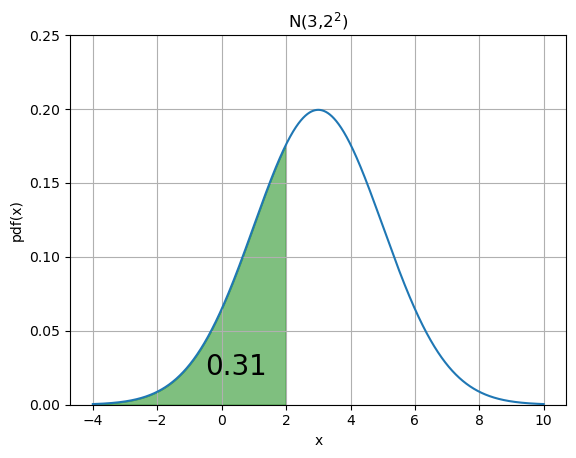

In [9]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01) #genera valores para sombrear
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(norm.cdf(x=2, loc=3, scale=2),2), fontsize=20)
plt.show()

Calculemos $\mathbb{P}(0.5<𝑋<2)$ cuando $X\sim N(1,2)$.

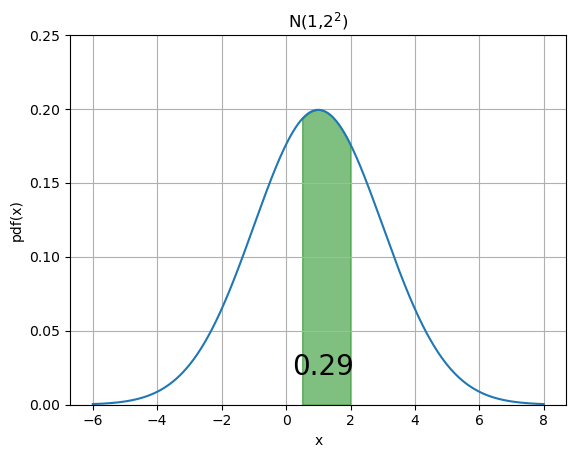

In [10]:
s=np.sqrt(2)
norm(1, s).cdf(2) - norm(1,s).cdf(0.5)
fig, ax = plt.subplots()
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

**Ejemplo importante** Si $Z\sim N(0,1)$, encuentra $\mathbb{P}(-1.93 < Z < 1.93)$. La probabilidad buscada es:

In [11]:
norm(0,1).cdf(1.93)-norm(0,1).cdf(-1.93)

np.float64(0.9463931622458901)

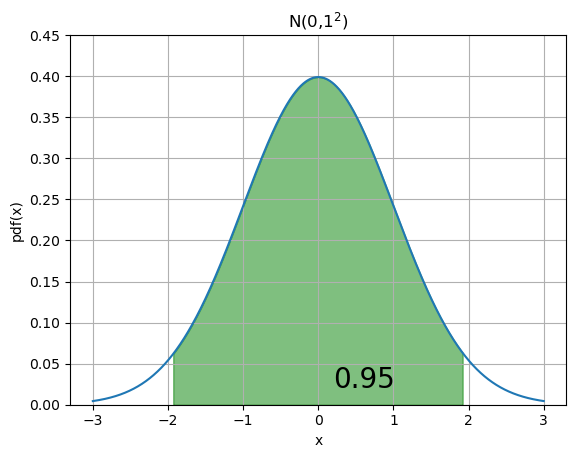

In [12]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-3,3,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-1.93,1.93,0.01)
ax.set_ylim(0,0.45)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')
pro=norm(0, 1).cdf(1.93) - norm(0,1).cdf(-1.93)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

### 3.3 Variable aleatoria exponencial con parámetro $\lambda >0$.

La distribución exponencial es una de las distribuciones continuas más utilizadas. A menudo se utiliza para modelar el tiempo transcurrido entre eventos.  

Algunos ejemplos en los que podría utilizarse la distribución exponencial son:
* El tiempo transcurrido en un call center hasta recibir la primer llamada del día.
* El  tiempo entre terremotos de una determinada magnitud.
* Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.

Se dice que la variable aleatoria $X$ tiene distribución exponecial de parámetro $\lambda>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
\lambda e^{-\lambda x} & x>0\\
0 & \text{en otro caso}
\end{cases}$$


Notación. $X\sim \exp(\lambda).$


**Ejemplo** de una variable aleatoria Exponencial

Supongamos que los clientes llegan a una tienda de forma aleatoria, y en promedio llega **1 cliente cada 10 minutos**.  
El tiempo de espera entre dos clientes sigue una distribución exponencial:

$$
X \sim \text{Exp}(\lambda = 0.1)
$$

donde:
- $(\lambda = 0.1)$ es la tasa de llegada (clientes por minuto),
- el valor esperado es $(E[X] = \frac{1}{\lambda} = 10)$ minutos,
- la varianza es $(\mathrm{Var}(X) = \frac{1}{\lambda^2} = 100).$

Función de densidad (PDF)
$$
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

Probabilidad de que el tiempo de espera sea menor a 5 minutos

$$
P(X \leq 5) = 1 - e^{-\lambda \cdot 5} = 1 - e^{-0.5} \approx 0.393
$$

Existe un **39.3% de probabilidad** de que el próximo cliente llegue en menos de 5 minutos.

**Entonces**

- $$(E[X] = 10) minutos$$
- $$(\mathrm{Var}(X) = 100)$$
- $$(P(X \leq 5) \approx 0.393)$$


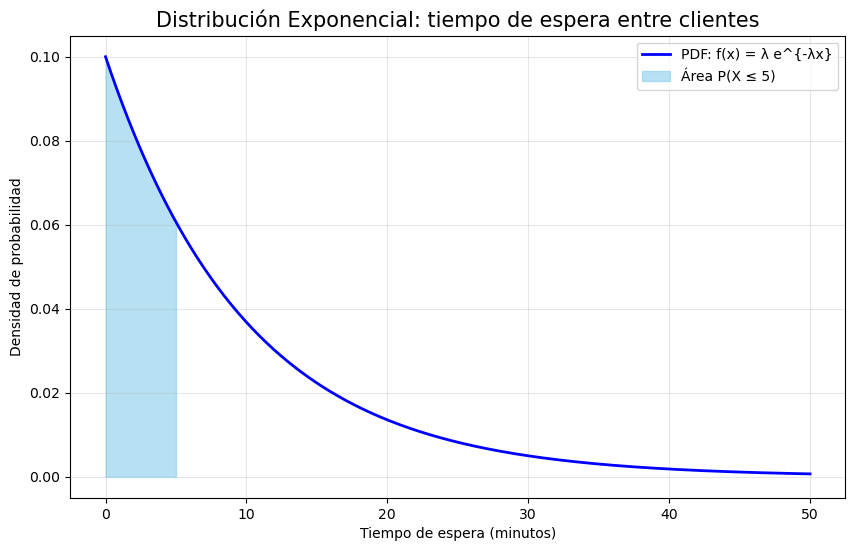

📊 Resultados de la distribución exponencial Exp(λ=0.1)
P(X ≤ 5) = 0.393
Esperanza (E[X]) = 10.00
Varianza (Var[X]) = 100.00


In [13]:
# Ejemplo: Distribución Exponencial
# ---------------------------------------
# Contexto: Tiempo de espera entre clientes en una tienda

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parámetro de la distribución
lmbda = 0.1   # tasa de llegada (1 cada 10 min)
X = expon(scale=1/lmbda)  # escala = 1/lambda

# Rango de valores
x = np.linspace(0, 50, 500)
pdf = X.pdf(x)

# Probabilidad de que el tiempo de espera sea menor a 5 minutos
p_menor_5 = X.cdf(5)

# --------------------------------------
# Gráfica
# --------------------------------------
plt.figure(figsize=(10,6))
plt.plot(x, pdf, "b-", lw=2, label="PDF: f(x) = λ e^{-λx}")

# Resaltamos el área bajo la curva en [0,5]
x_fill = np.linspace(0, 5, 200)
plt.fill_between(x_fill, 0, X.pdf(x_fill), color="skyblue", alpha=0.6, label="Área P(X ≤ 5)")

plt.title("Distribución Exponencial: tiempo de espera entre clientes", fontsize=15)
plt.xlabel("Tiempo de espera (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------------------
# Resultados
# --------------------------------------
print("📊 Resultados de la distribución exponencial Exp(λ=0.1)")
print(f"P(X ≤ 5) = {p_menor_5:.3f}")
print(f"Esperanza (E[X]) = {1/lmbda:.2f}")
print(f"Varianza (Var[X]) = {(1/lmbda**2):.2f}")


**Ejemplo**

Consideremos la variable aleatoria $X$ como el tiempo (en minutos) entre la llegada de dos personas a la fila  de una sucuarsal bancaria.

Adicionalmente, el banco ha determinado que solo el $10\%$ de las veces, el tiempo que transcurre entre la llegada de una persona y otra es mayor a dos minutos.

Esto permite calcular el valor de $\lambda$, ya que
$$\mathbb{P}(X>2)=0.1$$
entonces
$$1-\mathbb{P}(X\le 2) = 1-F_{X}(2) = 0.1$$

Notemos que si $X\sim Exp\left( \lambda \right)$, entonces $F_{X})(x) = 1-e^{-\frac{x}{\lambda}}$

Por lo que $F_{X}(2)= 1-e^{\frac{-2}{\lambda}} =0.9$, entonces
$e^{\frac{-2}{\lambda}}=0.1$. Por lo que
$$\frac{-2}{\lambda}=\ln(0.1) \Rightarrow \lambda=0.87$$
Por lo tanto $X\sim\exp(0.87)$.

Ahora queremos calcular la probabilidad de que entre la llegada de una persona y otra transcurra por lo menos un minuto, lo cual puede calcularse de dos formas:


\begin{align*}
\mathbb{P}(X>1) &= \int_{1}^{\infty}f_{X}(x)dx = \int_{1}^{\infty}\frac{1}{0.87}e^{\frac{-x}{0.87}}dx = 0.32
\end{align*}

\begin{align*}
\mathbb{P}(X>1) &= 1-\mathbb{P}(X\le 1) = 1-\left[1-e^{\frac{-1}{0.87}}\right] = e^{\frac{-1}{0.87}}
\end{align*}

### 3.4 Variable aleatoria Gamma con parámetros $\alpha$ y $\lambda$.

 La distribución gamma se obtiene al considerar el tiempo que transcurre entre cierto número de ocurrencias de eventos que ocurren aleatoriamente en el tiempo

La función gamma $\Gamma:(0,\infty)\to \mathbb{R}$ está definida como
	$$\Gamma(\alpha)=\int_{0}^{\infty}t^{\alpha-1}e^{-t}dt.$$



*Propiedades de la función gamma*.
- $\Gamma(\alpha)<\infty$ para cualquier $\alpha>0$.
- $\Gamma(\alpha+1)=\alpha\Gamma(\alpha)$.
- Si $n\geq 1$ $\Gamma(n)=(n-1)!$
- $\Gamma\left(\frac{1}{2} \right)=\sqrt{\pi}$.



 Si $\alpha$ y $\lambda$ son reales positivos, decimos que una variable aleatoria $X$ tiene distribución gamma con parámetros $\alpha$ y $\lambda$ si tiene por función de densidad:
	$$\displaystyle f_{X}(x)=\begin{cases}
	\displaystyle \frac{\lambda^{\alpha}x^{\alpha-1}e^{-\lambda x} }{\Gamma(\alpha)} & x>0\\
	0 & \text{en otro caso}
	\end{cases}$$
En esta caso, escribimos la información anterior como $X\sim \Gamma(\alpha,\lambda) $


**Ejemplo** de una variable aleatoria Gamma

Supongamos que el tiempo de vida (en horas) de cierto componente electrónico sigue una distribución Gamma con parámetros:

$$
X \sim \text{Gamma}(k=3, \lambda=0.5)
$$

donde:
- $(k = 3)$ es el **parámetro de forma** (número de fallas acumuladas o "etapas"),
- $(\lambda = 0.5)$ es el **parámetro de tasa** (1/hora),
- la media es $(\mathbb{E}[X] = \frac{k}{\lambda} = \frac{3}{0.5} = 6)$ horas,
- la varianza es $(\mathrm{Var}(X) = \frac{k}{\lambda^2} = \frac{3}{0.25} = 12).$

Función de densidad de probabilidad (PDF)
$$
f(x) =
\begin{cases}
\frac{\lambda^k}{\Gamma(k)} x^{k-1} e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

Ejemplo: probabilidad de que el componente dure menos de 5 horas

$$
P(X \leq 5) = \int_0^5 \frac{0.5^3}{\Gamma(3)} x^{2} e^{-0.5 x} dx
$$

Usando la función de distribución acumulada (CDF), se obtiene:

$$
P(X \leq 5) \approx 0.477
$$

Existe un **47.7% de probabilidad** de que el componente dure menos de 5 horas.

**Entonces**
- Media: $$(E[X] = 6) horas$$
- Varianza: $$(\mathrm{Var}(X) = 12)$$  
- $$(P(X \leq 5) \approx 0.477)$$


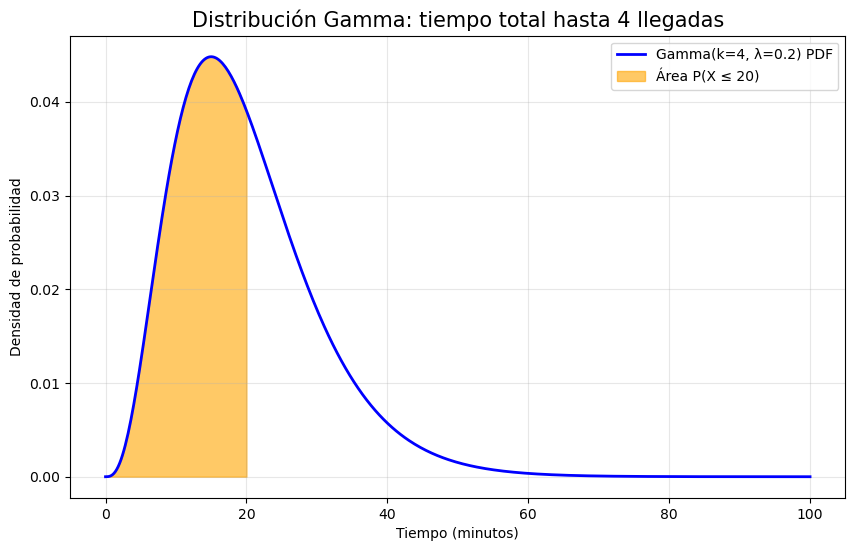

📊 Resultados de la distribución Gamma
P(X ≤ 20) = 0.567
Esperanza (E[X]) = 20.00
Varianza (Var[X]) = 100.00


In [15]:
# Ejemplo: Distribución Gamma
# Contexto: Tiempo hasta que lleguen 4 clientes en un banco
# Si cada llegada ~ Exp(λ=0.2), entonces el tiempo total ~ Gamma(k=4, λ=0.2)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parámetros
k = 4         # número de llegadas deseadas
lmbda = 0.2   # tasa de llegada
scale = 1/lmbda  # en scipy se usa "scale"

# Variable Gamma
X = gamma(a=k, scale=scale)

# Rango de valores
x = np.linspace(0, 100, 500)
pdf = X.pdf(x)

# Probabilidad de que los 4 clientes lleguen en menos de 20 minutos
p_menor_20 = X.cdf(20)

# Gráfica
plt.figure(figsize=(10,6))
plt.plot(x, pdf, "b-", lw=2, label=f"Gamma(k={k}, λ={lmbda}) PDF")

# Área bajo la curva
x_fill = np.linspace(0, 20, 200)
plt.fill_between(x_fill, 0, X.pdf(x_fill), color="orange", alpha=0.6, label="Área P(X ≤ 20)")

plt.title("Distribución Gamma: tiempo total hasta 4 llegadas", fontsize=15)
plt.xlabel("Tiempo (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Resultados

mean_theoretical = k / lmbda
var_theoretical = k / (lmbda**2)

print("📊 Resultados de la distribución Gamma")
print(f"P(X ≤ 20) = {p_menor_20:.3f}")
print(f"Esperanza (E[X]) = {mean_theoretical:.2f}")
print(f"Varianza (Var[X]) = {var_theoretical:.2f}")


## 4. Simulación de Variables aleatorias

La transformada inversa genera variables aleatorias continuas a partir de $U\sim Unif(0,1)$: si $F$ es la CDF de $X$, entonces $X=F^{-1}(U)$ tiene la distribución deseada.

Históricamente se han usado cuatro tipos de métodos para generar sucesiones de números rectangulares:
- Métodos manuales
- Tablas de biblioteca
- Computación analógica
- Computación digital

#### Método de la transformada inversa

El método utiliza la función de distribución $F(x)$ de la distribución que se va a simular 
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

![alt text](download-1.png)

Como se sabe, los valores de $F(x)$ están en el intervalo $(0,1)$ al igual que los números rectangulares $U$. 

El método genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$ F(x) = U \quad \Rightarrow \quad x = F^{-1}(U)$$

![alt text](download.png)

In [16]:
#Vamos a simular una v.a. bernoulli usando una uniforme
import random
def bernoulli(p):
    U = random.random() #genero una uniforme
    if U < p:
        return 1
    else:
        return 0


In [26]:
# Simulamos n valores con p de éxito
p = 0.5
simulaciones = [bernoulli(p) for _ in range(100)]
print(simulaciones)



[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


In [27]:
print("Número de éxitos:", sum(simulaciones))

Número de éxitos: 45


In [28]:
import plotly.express as px #para visualizacion interactiva
px.histogram(simulaciones, x= simulaciones, nbins=2, #porque es bernoulli
                title="Simulaciones de una v.a. Bernoulli con p=0.5",
                labels={"x":"Valor de la v.a. beroulli (0 es fracaso y 1 es éxito)"})

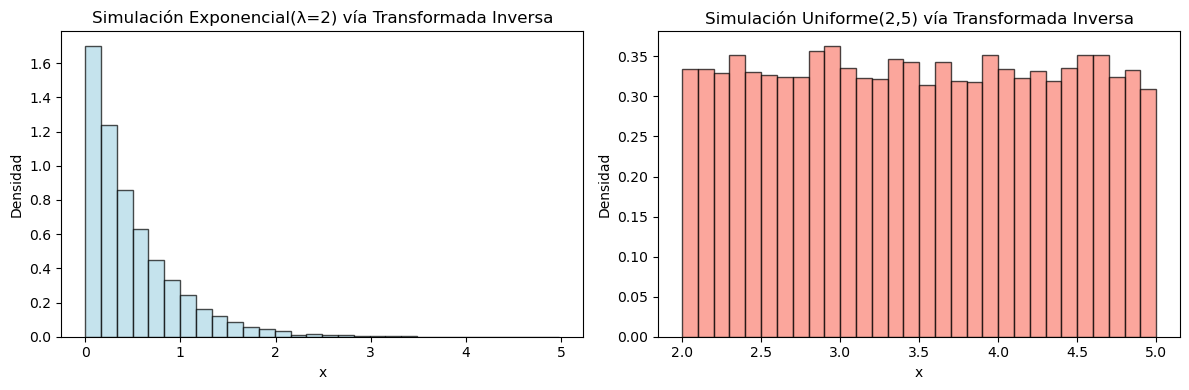

In [3]:
# Ejemplo:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 1. Distribución Exponencial(λ)
# ===============================
# Generamos U ~ Uniforme(0,1)
n = 10000
U = np.random.uniform(0, 1, n)

# Parámetro de la exponencial
lambd = 2  

# Método de la transformada inversa:
# X = - (1/λ) * ln(1 - U)
X_exp = -np.log(1 - U) / lambd

# ===============================
# 2. Distribución Uniforme(a, b)
# ===============================
a, b = 2, 5
# Para la uniforme, la inversa es: X = a + (b-a)*U
X_uni = a + (b - a) * U

# ===============================
# 3. Visualización
# ===============================
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Histograma exponencial
axs[0].hist(X_exp, bins=30, density=True, color="lightblue", edgecolor="black", alpha=0.7)
axs[0].set_title("Simulación Exponencial(λ=2) vía Transformada Inversa")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Densidad")

# Histograma uniforme
axs[1].hist(X_uni, bins=30, density=True, color="salmon", edgecolor="black", alpha=0.7)
axs[1].set_title("Simulación Uniforme(2,5) vía Transformada Inversa")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Densidad")

plt.tight_layout()
plt.show()


## 5. Funciones Generadoras


### 5.1 Función Generadora de Momentos (FGM)
**Definición**

Sea $X$ una variable aleatoria. La **función generadora de momentos** de $X$ se define como:

$$
M_X(t) = \mathbb{E}\big[e^{tX}\big], \quad \text{para } t \in \mathbb{R} \text{ donde la esperanza exista.}
$$

### Propiedades importantes:

1. $M_X(0) = 1$.
2. Si existen, los momentos de $X$ se obtienen mediante derivadas sucesivas evaluadas en $t=0$:
   $$
   \mathbb{E}[X^n] = M_X^{(n)}(0), \quad n=1,2,3,\dots
   $$
3. La FGM caracteriza completamente a la distribución de $X$.
4. Si $X$ y $Y$ son independientes:
   $$
   M_{X+Y}(t) = M_X(t) \cdot M_Y(t)
   $$

**Ejemplo** Distribución Bernoulli(p)

Sea $X \sim Bernoulli(p)$.  
La función generadora de momentos es:

$$
M_X(t) = \mathbb{E}[e^{tX}] = (1-p)e^{t\cdot 0} + p e^{t \cdot 1}
$$

$$
M_X(t) = (1-p) + pe^t
$$

Ahora, calculemos los primeros momentos:

- Media:
$$
E[X] = M'_X(0) = p
$$

- Varianza:
$$
Var(X) = M''_X(0) - (M'_X(0))^2 = p(1-p)
$$

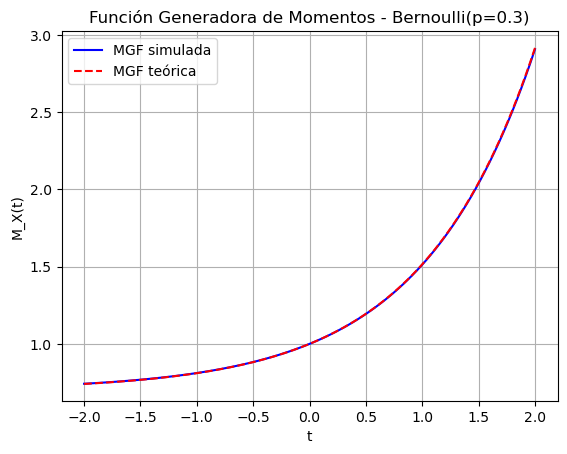

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro
p = 0.3
n = 100000

# Simulamos Bernoulli(p)
X = np.random.binomial(1, p, n)

# Estimación de la MGF
t_values = np.linspace(-2, 2, 100)
MGF_emp = [np.mean(np.exp(t*X)) for t in t_values]

# MGF teórica: M_X(t) = (1-p) + p e^t
MGF_theo = (1-p) + p*np.exp(t_values)

# Graficamos
plt.plot(t_values, MGF_emp, label="MGF simulada", color="blue")
plt.plot(t_values, MGF_theo, label="MGF teórica", linestyle="--", color="red")
plt.xlabel("t")
plt.ylabel("M_X(t)")
plt.title("Función Generadora de Momentos - Bernoulli(p=0.3)")
plt.legend()
plt.grid()
plt.show()


**Ejemplo** Distribución Poisson(λ)

Sea $X \sim Poisson(\lambda)$.  
La FGM se obtiene como:

$$
M_X(t) = \mathbb{E}[e^{tX}] = \sum_{k=0}^{\infty} e^{tk} \frac{e^{-\lambda} \lambda^k}{k!}
$$

$$
M_X(t) = e^{-\lambda} \sum_{k=0}^{\infty} \frac{(\lambda e^t)^k}{k!} = \exp(\lambda(e^t - 1))
$$

Momentos:
- Media: $$E[X] = M'_X(0) = \lambda$$  

- Varianza: $$Var(X) = M''_X(0) - (M'_X(0))^2 = \lambda$$


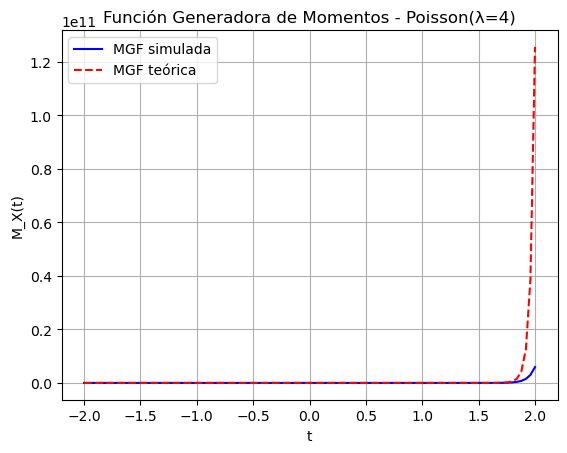

In [2]:
# Parámetro
lambd = 4
n = 100000

# Simulación de Poisson
X = np.random.poisson(lambd, n)

# Estimación de la MGF
t_values = np.linspace(-2, 2, 100)
MGF_emp = [np.mean(np.exp(t*X)) for t in t_values]

# MGF teórica: M_X(t) = exp(λ(e^t - 1))
MGF_theo = np.exp(lambd*(np.exp(t_values)-1))

# Gráfica
plt.plot(t_values, MGF_emp, label="MGF simulada", color="blue")
plt.plot(t_values, MGF_theo, label="MGF teórica", linestyle="--", color="red")
plt.xlabel("t")
plt.ylabel("M_X(t)")
plt.title("Función Generadora de Momentos - Poisson(λ=4)")
plt.legend()
plt.grid()
plt.show()


**Conclusiones**

- La **Función Generadora de Momentos (FGM)** es una herramienta muy poderosa para:
  - Caracterizar distribuciones.
  - Calcular momentos (media, varianza, etc.).
  - Analizar sumas de variables aleatorias.



### 5.2 Función Característica

**Definición**

Sea $X$ una variable aleatoria. Su **función característica** se define como:

$$
\varphi_X(t) = \mathbb{E}[e^{itX}], \quad t \in \mathbb{R}
$$

donde $i = \sqrt{-1}$.

**Propiedades:**

1. Siempre existe (a diferencia de la FGM).
2. $\varphi_X(0) = 1$.
3. Si $X$ y $Y$ son independientes:
   $$
   \varphi_{X+Y}(t) = \varphi_X(t) \cdot \varphi_Y(t)
   $$
4. Permite obtener los momentos (si existen):
   $$
   \mathbb{E}[X^n] = \frac{1}{i^n} \varphi_X^{(n)}(0)
   $$
5. Caracteriza de manera única a la distribución de $X$.


**Ejemplo** Bernoulli(p)

Sea $X \sim Bernoulli(p)$.

$$
\varphi_X(t) = \mathbb{E}[e^{itX}] = (1-p)e^{it \cdot 0} + p e^{it \cdot 1}
$$

$$
\varphi_X(t) = (1-p) + p e^{it}
$$

- Media:
$$
E[X] = \frac{1}{i} \varphi'_X(0) = p
$$

- Varianza:
$$
Var(X) = E[X^2] - (E[X])^2 = p(1-p)
$$

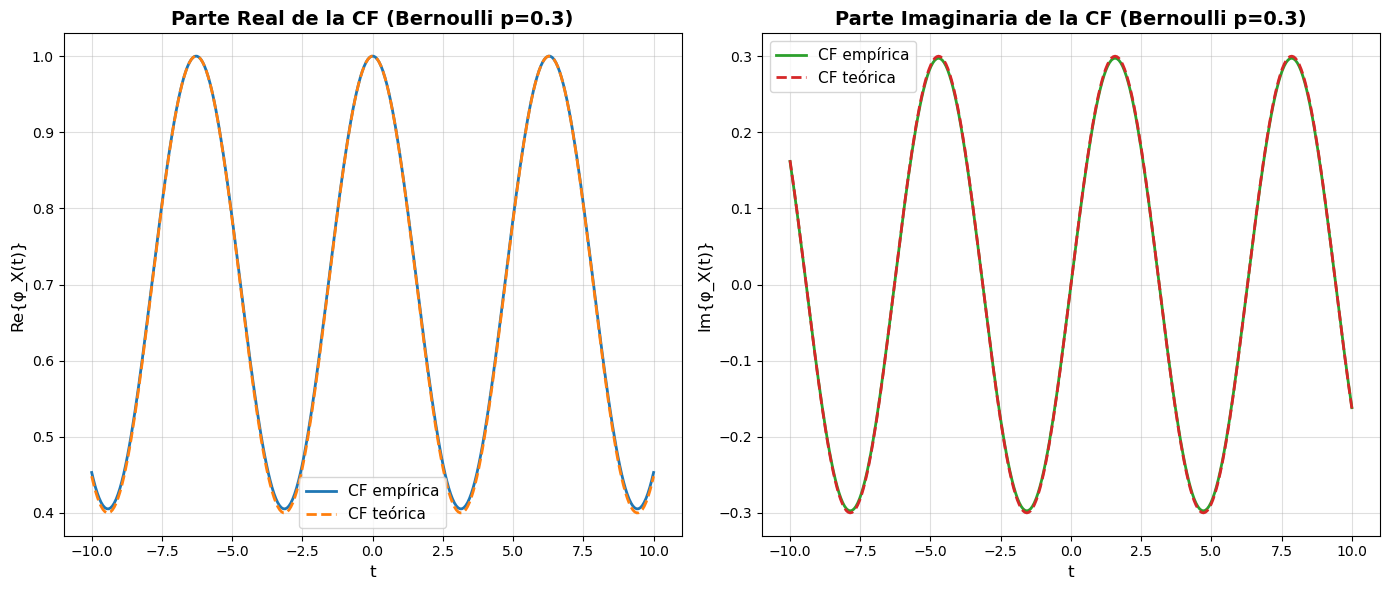

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro
p = 0.3
n = 100000

# Simulación Bernoulli
X = np.random.binomial(1, p, n)

# Valores de t
t_values = np.linspace(-10, 10, 300)

# Estimación empírica de la CF
CF_emp = [np.mean(np.exp(1j * t * X)) for t in t_values]

# CF teórica
CF_theo = (1-p) + p*np.exp(1j*t_values)

# ============================
# Gráficas mejoradas
# ============================
plt.figure(figsize=(14,6))

# Parte Real
plt.subplot(1,2,1)
plt.plot(t_values, np.real(CF_emp), label="CF empírica", color="#1f77b4", linewidth=2)
plt.plot(t_values, np.real(CF_theo), "--", label="CF teórica", color="#ff7f0e", linewidth=2)
plt.title("Parte Real de la CF (Bernoulli p=0.3)", fontsize=14, fontweight="bold")
plt.xlabel("t", fontsize=12)
plt.ylabel("Re{φ_X(t)}", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)

# Parte Imaginaria
plt.subplot(1,2,2)
plt.plot(t_values, np.imag(CF_emp), label="CF empírica", color="#2ca02c", linewidth=2)
plt.plot(t_values, np.imag(CF_theo), "--", label="CF teórica", color="#d62728", linewidth=2)
plt.title("Parte Imaginaria de la CF (Bernoulli p=0.3)", fontsize=14, fontweight="bold")
plt.xlabel("t", fontsize=12)
plt.ylabel("Im{φ_X(t)}", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


**Ejemplo** Normal(μ, σ²)

Sea $X \sim N(\mu, \sigma^2)$.

La función característica es:

$$
\varphi_X(t) = \mathbb{E}[e^{itX}] = \exp\left(i \mu t - \frac{1}{2}\sigma^2 t^2\right)
$$

- Media:
$$
E[X] = \frac{1}{i} \varphi'_X(0) = \mu
$$

- Varianza:
$$
Var(X) = -\varphi''_X(0) - (E[X])^2 = \sigma^2
$$


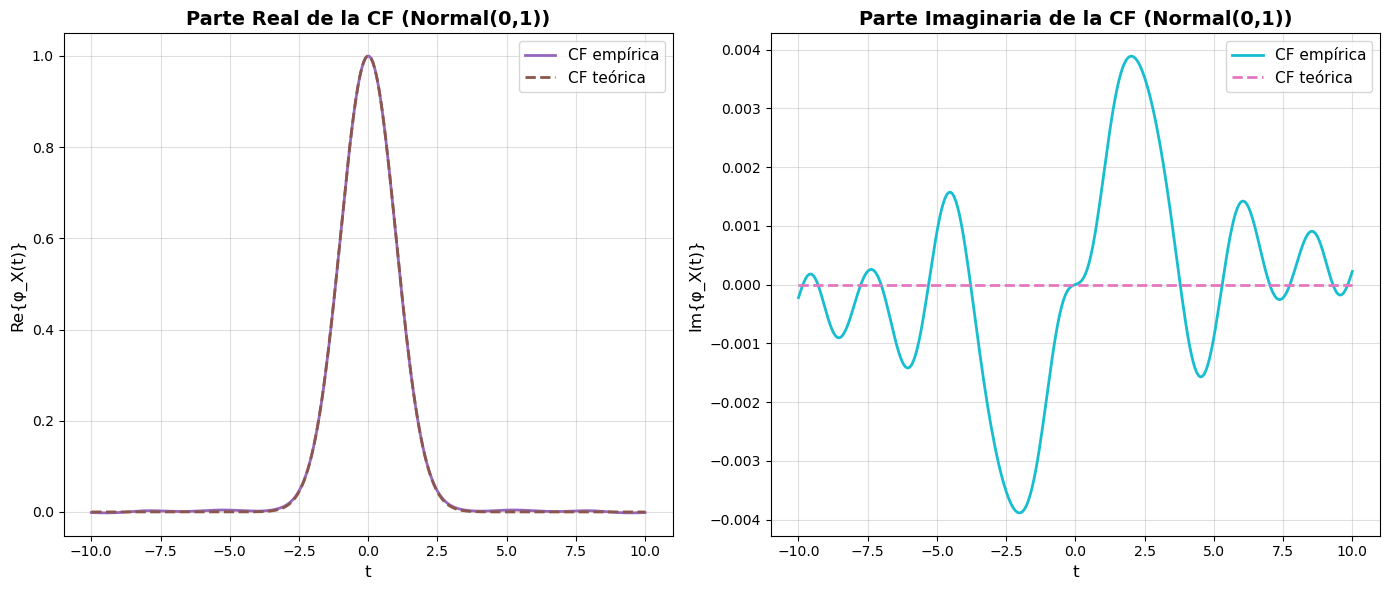

In [5]:
# Parámetros
mu, sigma = 0, 1
n = 100000

# Simulación Normal
X = np.random.normal(mu, sigma, n)

# Valores de t
t_values = np.linspace(-10, 10, 300)

# CF empírica
CF_emp = [np.mean(np.exp(1j * t * X)) for t in t_values]

# CF teórica
CF_theo = np.exp(1j*mu*t_values - 0.5*sigma**2*t_values**2)

# ============================
# Gráficas mejoradas
# ============================
plt.figure(figsize=(14,6))

# Parte Real
plt.subplot(1,2,1)
plt.plot(t_values, np.real(CF_emp), label="CF empírica", color="#9467bd", linewidth=2)
plt.plot(t_values, np.real(CF_theo), "--", label="CF teórica", color="#8c564b", linewidth=2)
plt.title("Parte Real de la CF (Normal(0,1))", fontsize=14, fontweight="bold")
plt.xlabel("t", fontsize=12)
plt.ylabel("Re{φ_X(t)}", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)

# Parte Imaginaria
plt.subplot(1,2,2)
plt.plot(t_values, np.imag(CF_emp), label="CF empírica", color="#17becf", linewidth=2)
plt.plot(t_values, np.imag(CF_theo), "--", label="CF teórica", color="#e377c2", linewidth=2)
plt.title("Parte Imaginaria de la CF (Normal(0,1))", fontsize=14, fontweight="bold")
plt.xlabel("t", fontsize=12)
plt.ylabel("Im{φ_X(t)}", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


**Conclusiones**

- La **Función Característica (CF)** siempre existe y caracteriza completamente a la distribución de una variable aleatoria.
- Los momentos (si existen) se obtienen derivando en $t=0$.
La CF es muy útil en:
- Demostraciones teóricas (Límite Central, convoluciones).
- Reconocimiento de distribuciones.
- Obtención de momentos.



## 6. Teorema Central del Límite y Ley de los Grandes Números

 **1. Ley de los Grandes Números (LGN)**

 Establece que el promedio muestral converge (en algun sentido) al valor esperado conforme aumenta el tamaño de la muestra.

🔹 **Definición:**

Sea $(X_1, X_2, \dots, X_n)$ una sucesión de variables aleatorias independientes e idénticamente distribuidas (i.i.d.) con esperanza finita $(\mu = \mathbb{E}[X_i]).$

La **Ley de los Grandes Números** establece que:

$$
\overline{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{n \to \infty} \mu \quad \text{(casi seguramente)}.
$$

Es decir, **la media muestral converge a la media poblacional** cuando el tamaño de la muestra crece.

🔹 Aplicaciones:

- Encuestas y sondeos de opinión.  
- Estimación de parámetros en estadística.  
- Evaluación de riesgos en seguros y finanzas.  



**2. Teorema Central del Límite (TCL)**

Se utilizó para apróximar una distribución binomial a una normal por De Moiure en 1733

🔹 **Definición:**
$
Sean $$(X_1, X_2, \dots, X_n)$$ variables aleatorias i.i.d. con media $(\mu)$ y varianza $(\sigma^2 < \infty).$

El TCL establece que la variable aleatoria normalizada:

$$
Z_n = \frac{\overline{X}_n - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} \mathcal{N}(0,1) \quad \text{cuando } n \to \infty.
$$

En palabras: **la distribución de la media muestral tiende a una Normal estándar, sin importar la distribución original de las variables.**

🔹 Aplicaciones:

- Justificación del uso de la distribución normal en estadística.  
- Contrastes de hipótesis y pruebas de significancia.  
- Intervalos de confianza.  
- Modelos financieros y predicciones de series temporales.
Ley de los Grandes Números (LGN) y Teorema del Límite Central (TLC)


### Problema de la Aguja de Bufón

Este experimento consiste en dejar caer una aguja sobre una hoja rayada y anotar las veces que la aguja cruza alguna de las rayas. Después de lanzar la aguja muchísimas veces comprobó que su experimento estaba íntimamente relacionado con el número . Para obtener un número muy parecido a , hay que dejar caer la aguja muchísimas veces sobre la hoja, multiplicar esta cantidad por dos y dividir el resultado entre el número de veces que la aguja cruzó alguna de las rayas.

Estimación de pi: [3.0721966205837172, 3.1201248049921997, 3.0991735537190084, 3.108003108003108, 3.114294612270321, 3.125, 3.1397174254317113, 3.131115459882583, 3.1435557107928744, 3.146633102580239, 3.157743648629252, 3.1520882584712373, 3.144273793687266, 3.141831238779174, 3.133486526007938, 3.1338752325923025, 3.1327743481065142, 3.1307070180015653, 3.1255140648132915, 3.1259768677711786, 3.129190880643719, 3.128332740846072, 3.1309556221072694, 3.1335683509596555, 3.134796238244514, 3.1334739379331125, 3.133886599733039, 3.1346207668625805, 3.137000378603494, 3.1359431348978206, 3.135113268608414, 3.134335667760419, 3.137478608100399, 3.139427516158818, 3.1360602123560772, 3.1341139598659296, 3.131877433553411, 3.1337621639452418, 3.1382015691007847, 3.138485680659082, 3.1397174254317113, 3.1394827328449693, 3.141093538843639, 3.141622933847417, 3.141141979617479, 3.1397174254317113, 3.14087142475274, 3.142492389276245, 3.1435445068163594, 3.1427763286086927, 3.142329020332717, 

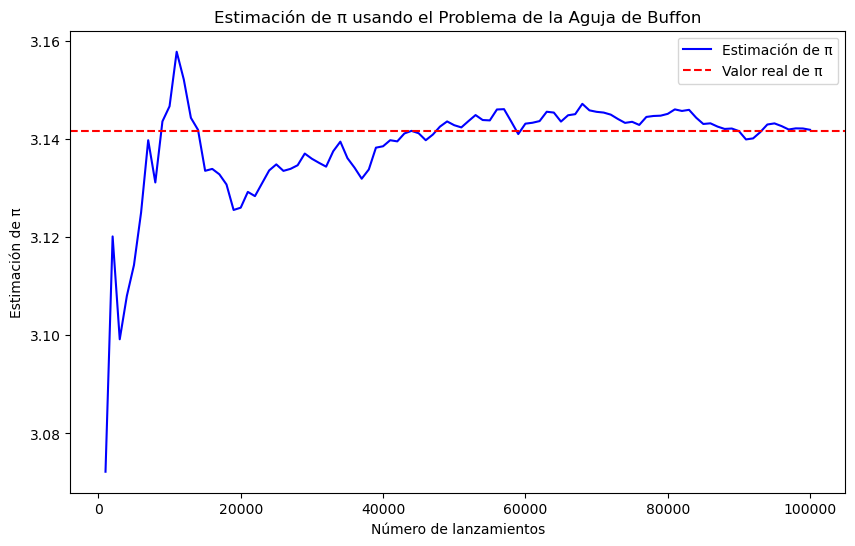

In [11]:
# Parámetro del problema
L = 1.0 # longitud de la aguja
d = 1.0 # distancia entre las líneas paralelas
num_lanzamientos = 100000 # número total de lanzamientos
step = 1000 # el número de pasos
# Vamos a crear mis listas para guardar los resultados
pi_estimados = [] # almacena los valores de pi estimados
lanzamientos_realizados = [] # almacena el número de lanzamientos realizados
# Contador de los cruces de la línea
# Para saber cuantas agujas cruzan una línea
cruces = 0

# Simulación de los lanzamientos de la aguja y la estimación de pi en pasos
for i in range(1, num_lanzamientos + 1):
    # Posición del centro de la aguja (uniforme entre 0 y d/2)
    centro = np.random.uniform(0, d/2)
    # Ángulo aleatorio entre 0 y pi (ángulo en radianes)
    angulo = np.random.uniform(0, np.pi)
    # Distancia desde el centro de la aguja hasta la línea más cercana
    distancia = (L / 2) * np.sin(angulo)
    # Verificamos si la aguja cruza una línea
    if centro <= distancia: # si la distancia al centro es menor o igual a la distancia calculada
        cruces += 1 # incrementamos el contador de cruces
    
    # Estimación de pi en pasos
    if i % step == 0 and cruces > 0:
        pi_estimado = (2 * L * i) / (d * cruces)
        pi_estimados.append(pi_estimado)
        lanzamientos_realizados.append(i)

print(f"Estimación de pi: {pi_estimados}")
# Graficamos la estimación de pi
plt.figure(figsize=(10,6))
plt.plot(lanzamientos_realizados, pi_estimados, label='Estimación de π', color='blue')
plt.axhline(np.pi, color='red', linestyle='--', label='Valor real de π')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Estimación de π')
plt.title('Estimación de π usando el Problema de la Aguja de Buffon')    
plt.legend()
plt.show()

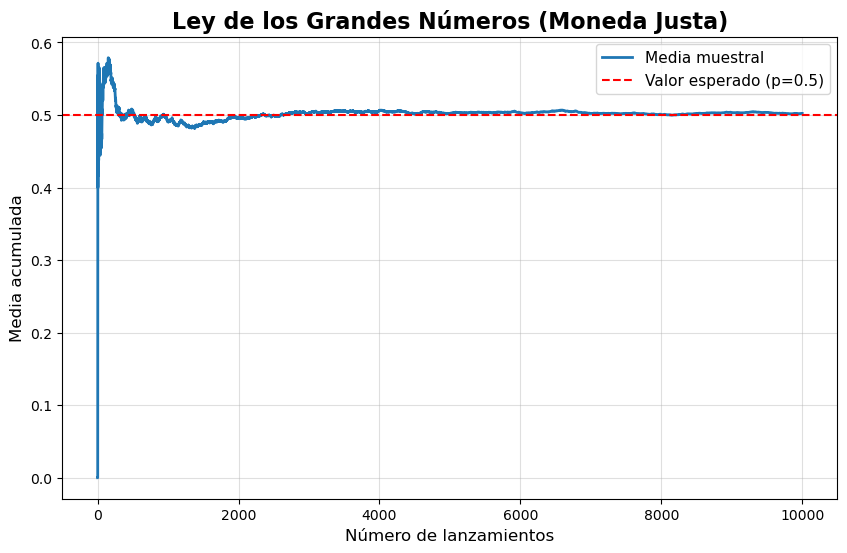

In [7]:
# Ejemplo: Ley de los Grandes Números
# Contexto: Lanzamiento de una moneda justa (p=0.5)
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n = 10000
p = 0.5

# Simulación: lanzamientos de moneda
X = np.random.binomial(1, p, n)
media_muestral = np.cumsum(X) / np.arange(1, n+1)

# Gráfica
plt.figure(figsize=(10,6))
plt.plot(media_muestral, label="Media muestral", color="#1f77b4", linewidth=2)
plt.axhline(p, color="red", linestyle="--", label="Valor esperado (p=0.5)")
plt.title("Ley de los Grandes Números (Moneda Justa)", fontsize=16, fontweight="bold")
plt.xlabel("Número de lanzamientos", fontsize=12)
plt.ylabel("Media acumulada", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)
plt.show()


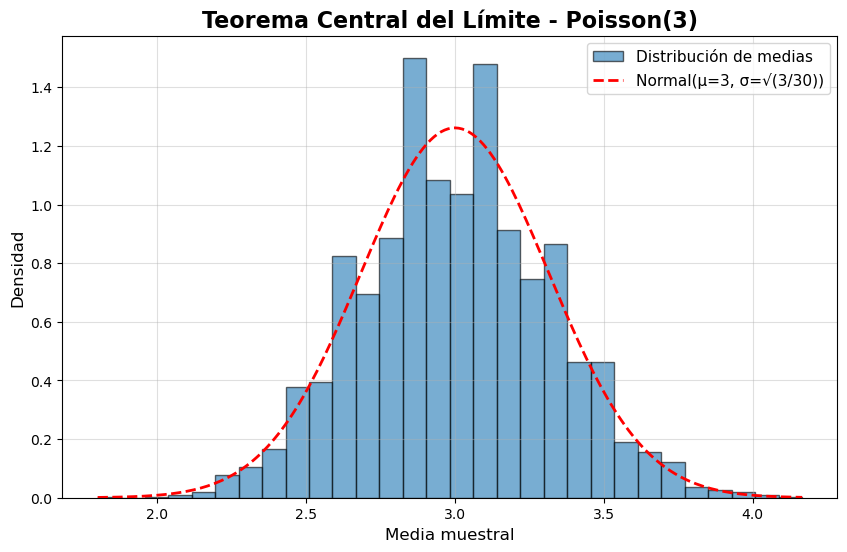

In [8]:
# Ejemplo: Teorema Central del Límite
# Contexto: Medias muestrales de una distribución Poisson(λ=3
# Parámetros
n_muestras = 10000
n = 30  # tamaño de muestra
lambda_poisson = 3

# Simulación de medias muestrales de una distribución Poisson
medias = []
for _ in range(n_muestras):
    X = np.random.poisson(lambda_poisson, n)
    medias.append(np.mean(X))

# Graficar histograma y superponer normal
plt.figure(figsize=(10,6))
plt.hist(medias, bins=30, density=True, alpha=0.6, color="#1f77b4", edgecolor="black", label="Distribución de medias")

# Normal teórica del TCL
mu = lambda_poisson
sigma = np.sqrt(lambda_poisson / n)
x = np.linspace(min(medias), max(medias), 200)
f = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(x, f, "r--", linewidth=2, label="Normal(μ=3, σ=√(3/30))")
plt.title("Teorema Central del Límite - Poisson(3)", fontsize=16, fontweight="bold")
plt.xlabel("Media muestral", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)
plt.show()


- La **Ley de los Grandes Números** garantiza que la media de una muestra grande se aproxima al valor esperado real.  
- El **Teorema Central del Límite** explica por qué la distribución normal aparece tan frecuentemente en estadística: describe la distribución de la media muestral.  
- Ambos resultados fundamentan gran parte de la **estadística inferencial**.  


## 📚 Bibliografía
- Luis Rincón, *Probabilidad y Estadística*.
- Sheldon Ross, *A First Course in Probability*.
- Alexander Mood, Franklin Graybill, Duane Boes, *Introduction to the Theory of Statistics*.
- Richard Mendelhall, *Introduction to Probability and Statistics*.